In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk import pos_tag
from nltk.chunk import ne_chunk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from nltk.tree import Tree
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('maxent_ne_chunker')
import nltk
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\royti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\royti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\royti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\royti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\royti\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\royti\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

True

In [2]:
pd.set_option('display.max.rows', 1348)

# Предобработка данных

In [3]:
df = pd.read_csv('Вакансии BI-аналитиков.csv')

In [4]:
# Предварительная обработка данных
stop_words = set(stopwords.words("russian"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words and token.isalnum()]
    return " ".join(filtered_tokens)

df["tokens"] = df["Описание вакансии"].apply(preprocess_text)

# Произведён анализ связей между словами, понимание синтаксической и семантической структуры предложений

In [5]:
word_relations = defaultdict(lambda: defaultdict(int))

for tokens in df["tokens"]:
    for i in range(len(tokens) - 1):
        word_relations[tokens[i]][tokens[i+1]] += 1

# Выводим 5 наиболее часто встречающихся слов, следующих за каждым словом
for word, next_words in word_relations.items():
    sorted_next_words = sorted(next_words.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f"Слово '{word}': {sorted_next_words}")

# Понимание синтаксической и семантической структуры предложений
def extract_named_entities(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    named_entities = ne_chunk(tagged_words)
    return named_entities

for idx, description in enumerate(df["Описание вакансии"]):
    print(f"\nПредложение {idx + 1}:")
    named_entities = extract_named_entities(description)
    for entity in named_entities:
        if isinstance(entity, Tree):
            print(' '.join([child[0] for child in entity]), "-", entity.label())

Слово 'п': [('р', 19457), ('о', 14658), ('ы', 4488), ('е', 3585), ('а', 3515)]
Слово 'р': [('а', 30971), ('о', 23983), ('е', 15878), ('и', 7395), ('у', 6185)]
Слово 'о': [('в', 30501), ('т', 20498), ('с', 14594), ('р', 14181), ('м', 12123)]
Слово 'д': [('а', 13770), ('е', 9213), ('о', 6414), ('и', 4193), ('н', 3361)]
Слово 'у': [(' ', 4271), ('ч', 3654), ('р', 2961), ('м', 2844), ('д', 2738)]
Слово 'к': [('о', 17603), ('а', 12073), ('и', 9252), ('т', 6451), (' ', 3652)]
Слово 'т': [('и', 18509), ('е', 14560), ('о', 13830), ('а', 13588), ('ь', 11935)]
Слово 'в': [('а', 15217), (' ', 10231), ('о', 7972), ('ы', 6867), ('и', 6676)]
Слово 'а': [('н', 33110), ('т', 17946), (' ', 16504), ('б', 12867), ('л', 12124)]
Слово 'я': [(' ', 19631), ('т', 2445), ('з', 1597), ('м', 1120), ('в', 601)]
Слово ' ': [('п', 30442), ('р', 21757), ('о', 20540), ('с', 20312), ('к', 15693)]
Слово 'м': [(' ', 13003), ('а', 10062), ('е', 9193), ('и', 9091), ('о', 6878)]
Слово 'н': [('и', 33905), ('о', 20074), ('ы'

Обязанности - GPE
Oracle BI - PERSON
Загрузка - PERSON
Написание - PERSON
Поддержка - PERSON
Анализ - PERSON
Участие - PERSON
Высшее - PERSON
Опыт - PERSON
Знание СУБД Microsoft - PERSON
Понимание - PERSON
Опыт - PERSON
Oracle Business - ORGANIZATION
Pentaho Data Integration - ORGANIZATION
SQL Server - ORGANIZATION
Дополнительные - PERSON
Участие - PERSON
Опыт - PERSON
Условия - PERSON
Соблюдение ТК РФ - PERSON
Официальная - PERSON
Возможность - PERSON

Предложение 15:
AutoAllianse - ORGANIZATION
Проект - PERSON
Разработка - PERSON
Реализация - PERSON
Создание - PERSON
Обеспечение - PERSON
ТСД - ORGANIZATION
ТСД - ORGANIZATION
Интеграция - PERSON
Поддержка - PERSON
Интеграция - PERSON
Быстрая - PERSON
Опыт - PERSON
МЦД - ORGANIZATION
Работа - PERSON
Перспективы - PERSON
График - PERSON
Квадрум - PERSON

Предложение 16:
Взаимодействие - PERSON
Умение - PERSON
TensorFlow - ORGANIZATION
Keras - PERSON
Умение - PERSON
Seaborn - PERSON
Python - PERSON
Pandas - PERSON
Kubernetes - PERSON
Пон

MySQL - ORGANIZATION
YandexCloud - ORGANIZATION
Знание Python - PERSON
Опыт - PERSON
BigQuery - ORGANIZATION
FireBase - ORGANIZATION
Навыки - PERSON
Стек - PERSON
Python - PERSON
MySQL - ORGANIZATION
AirFlow - ORGANIZATION
BigQuery - ORGANIZATION
FireBase - ORGANIZATION
Уютная - GPE
Продуктовый - PERSON
Тогда - PERSON

Предложение 43:
Обязанности - GPE
Подготовка - ORGANIZATION
Решение RnD - PERSON
Опыт - PERSON
ИТ - GPE
Опыт - PERSON
Внимательность - PERSON
Python - PERSON

Предложение 44:
Привет - GPE
Тинькофф - GPE
Райффайзен Банк - PERSON
Консалтинговая компания Frank RG - PERSON
Деловое - PERSON
Frank Media - PERSON
Осуществлять - PERSON
Создавать - PERSON
Участвовать - PERSON
Подготавливать - PERSON
Имеешь - PERSON
Excel - PERSON
Анализ - PERSON
Поиск - PERSON
Макросы - PERSON
ВПР - ORGANIZATION
ГПР - ORGANIZATION
Можешь - PERSON
Ориентирован - PERSON
Умеешь - PERSON
Обладаешь - PERSON
Готов - PERSON
Работу - PERSON
Конкурентную - PERSON
Испытательный - PERSON
Большой - PERSON
Ко

Компания - PERSON
Логистика - PERSON
Учёт - PERSON
Подготовка - PERSON
Автоматизация - PERSON
Нам - PERSON
Уверенные - PERSON
ВПР - ORGANIZATION
Будет - PERSON
Работу - PERSON
Полное - PERSON
Дотации на - PERSON
Скидки - PERSON
Железнодорожный - PERSON
Новомилетское - PERSON
Фрязево - PERSON
Ольгино - PERSON
Электроугли - GPE
Электросталь - GPE
Ногинск - PERSON
Железнодорожный - GPE
Кучино - GPE
Овражки - PERSON
Красково - GPE
Малаховка - PERSON
Люберцы - PERSON
Ольгино - GPE

Предложение 65:
Компания - PERSON
Логистика - PERSON
Учёт - PERSON
Подготовка - PERSON
Автоматизация - PERSON
Нам - PERSON
Уверенные - PERSON
ВПР - ORGANIZATION
Будет - PERSON
Работу - PERSON
Полное - PERSON
Дотации на - PERSON
Скидки - PERSON
Железнодорожный - PERSON
Новомилетское - PERSON
Фрязево - PERSON
Ольгино - PERSON
Электроугли - GPE
Электросталь - GPE
Ногинск - PERSON
Железнодорожный - GPE
Кучино - GPE
Овражки - PERSON
Красково - GPE
Малаховка - PERSON
Люберцы - PERSON
Ольгино - GPE

Предложение 66:
Кома

Мы - GPE
Опыт - PERSON
Опыт - PERSON
Python - PERSON
SQL - ORGANIZATION
АПИ - ORGANIZATION
Глубокое - ORGANIZATION
Опыт - PERSON
Опыт - PERSON
Опыт - PERSON
Выдаем - PERSON
ДМС - ORGANIZATION
Развитую - ORGANIZATION
Внешнее - PERSON

Предложение 92:
Райффайзен Банке - ORGANIZATION
Operations - PERSON
SQL - ORGANIZATION
PowerBI - ORGANIZATION
SuperSet - ORGANIZATION
DataLens - ORGANIZATION
Tableau - GPE
DWH - ORGANIZATION
Python - PERSON

Предложение 93:
Подготавливать - PERSON
Развивать - PERSON
Разрабатывать - PERSON
Развивать - PERSON
Работа - PERSON
Умение - PERSON
Уверенный - PERSON
Excel - PERSON
PowerPoint - ORGANIZATION
Word - GPE
Корпоративные - PERSON
Забота - PERSON
ДМС - ORGANIZATION
Возможности - PERSON

Предложение 94:
Проводить - PERSON
Проверять - PERSON
Формировать - PERSON
Формирование - PERSON
Clickhouse - ORGANIZATION
Анализировать - PERSON
Разрабатывать - PERSON
Извлечение - GPE
Опыт - PERSON
Python - PERSON
Уверенные - PERSON
Опыт - PERSON
Apache Airflow - PERSON
О

XCMG - ORGANIZATION
Yellow Table - PERSON
России - PERSON
Подготовка - PERSON
Анализ - PERSON
Детальное - PERSON
Сбор - GPE
Проведение - PERSON
Выполнение - PERSON
Постановка - PERSON
Консультации - PERSON
Опыт - PERSON
Понимание - PERSON
Умение - PERSON
Общительность - GPE
ДО - ORGANIZATION
БП - ORGANIZATION
КА - GPE
Опыт - PERSON
CMS - ORGANIZATION
CRM - ORGANIZATION
Youtracke - ORGANIZATION
Грамотная - PERSON
Высшее - PERSON
Умение - PERSON
Условия - PERSON
Привлекательная - GPE
Пятидневная - PERSON
ДМС - ORGANIZATION
Комфортные - PERSON
Дружный - PERSON
Место - PERSON
Москва - PERSON
Новомещерский - PERSON
ЖД - ORGANIZATION
ЖД - ORGANIZATION

Предложение 123:
Создание - PERSON
Мониторинг - PERSON
Подключение - PERSON
CRM - ORGANIZATION
Банка - PERSON
SQL - ORGANIZATION
SAS - ORGANIZATION
SAS - ORGANIZATION
HCL Unica - ORGANIZATION
Москвы - PERSON
ДМС - ORGANIZATION
Гибридный - PERSON
Оплачиваемый - PERSON
Улучшенные - PERSON
Скидки - PERSON
Бонус - PERSON
Легкую - PERSON
Насыщенную

СКТ - ORGANIZATION
Владение SQL - PERSON
Excel - GPE
ВПР - ORGANIZATION
Нужны - PERSON
Постоянно - PERSON
Внедрять - PERSON
Помогать - PERSON
Выдвигать - PERSON
Сильные - PERSON
Способность - PERSON
Умение - PERSON
Обладаешь - PERSON
Любопытство - PERSON
Творчество - GPE
Премии - PERSON
ДМС - ORGANIZATION
Приятные - PERSON
Приведи - PERSON
Офис - PERSON

Предложение 145:
Главный - PERSON
Les Art - PERSON
Лучший - PERSON
Интеграция Data Science - ORGANIZATION
Исследовательская - PERSON
EDA - ORGANIZATION
Les Art Resort - PERSON
Python - PERSON
Исследовательская - PERSON
EDA - ORGANIZATION
Classification - PERSON
Clustering - GPE
Grid - GPE
Ensemble - PERSON
Опыт - PERSON
Соответствующие - PERSON
Далее - PERSON
Компенсация - PERSON
Оформление - PERSON

Предложение 146:
Задачи - GPE
Сбор - PERSON
Создание - PERSON
Python - PERSON
Если - ORGANIZATION
Опыт - PERSON
Опыт - PERSON
Знание DAX - PERSON
Python - PERSON
Удобный - PERSON
ДМС - ORGANIZATION
Насыщенную - PERSON
Профессиональное - PE

Требования - GPE
Высшее - PERSON
Стаж - PERSON
Знание - PERSON
Навыки - PERSON
Apache Superset - PERSON
Modus - PERSON
Форсайт - GPE
Анализ - PERSON
Поиск - PERSON
Участие - PERSON
Поиск - PERSON
Китая - PERSON
Турции - PERSON
Подготовка - ORGANIZATION

Предложение 171:
Yandex - PERSON
Mail.ru Group - ORGANIZATION
Сбер - PERSON
МТС - ORGANIZATION
Мегафон - PERSON
Qiwi - PERSON
BNP Paribas - ORGANIZATION
Команда - PERSON
ChatGPT - ORGANIZATION
Теперь - PERSON
LlamaIndex - ORGANIZATION
Высшее - PERSON
Seq2Seq - PERSON
BERT - ORGANIZATION
RoBERTa - ORGANIZATION
GPT - ORGANIZATION
T5 - PERSON
LLM - ORGANIZATION
LoRA - ORGANIZATION
QLoRa - ORGANIZATION
Python - PERSON
Опыт - PERSON
Возможности - PERSON
Возможность - PERSON
Работа - PERSON
Помощь - PERSON

Предложение 172:
Работа - PERSON
SQL - ORGANIZATION
Знание SQL - PERSON
Python - GPE
NumPy - ORGANIZATION
Pandas - GPE
Умение - PERSON
Офисы - PERSON
Москве - PERSON
Полностью - PERSON
Плавающий - PERSON
Предоставляем - PERSON
Уровень - PE

ВПР - ORGANIZATION
SQL - ORGANIZATION
Москвы - PERSON
ДМС - ORGANIZATION

Предложение 195:
Kubernetes - ORGANIZATION
JupyterHub - ORGANIZATION
AirFlow - ORGANIZATION
MLflow - ORGANIZATION
RAISA - ORGANIZATION
РСХБ - ORGANIZATION
Лаборатории - PERSON
ПРЕДСТОИТ - ORGANIZATION
ЗАНИМАТЬСЯ - ORGANIZATION
Взаимодействие - ORGANIZATION
ОЖИДАНИЯ - ORGANIZATION
Опыт - PERSON
Знание - PERSON
PostgreSQL - ORGANIZATION
Greenplum - GPE
Python - GPE
Будет - PERSON
FastAPI - ORGANIZATION
PySpark - ORGANIZATION
Обучение - ORGANIZATION
Забота - PERSON
ДМС - ORGANIZATION
Гибкий - PERSON
Москва - PERSON
Уфа - PERSON
Новосибирск - GPE
Белгород - PERSON
Скидки - ORGANIZATION

Предложение 196:
Управлять - PERSON
Выстраивать - PERSON
Обеспечивать - PERSON
Участвовать - PERSON
Взаимодействовать - PERSON
Проводить - PERSON
Обеспечивать - PERSON
Опыт - PERSON
Опыт - PERSON
Postgres - PERSON
ClickHouse - ORGANIZATION
MongoDB - ORGANIZATION
Apache AirFlow - PERSON
Business Intelligence - ORGANIZATION
Tableau - OR

Компания Sapiens - PERSON
СУБД Greenlum - ORGANIZATION
Старт - PERSON
Ссылку - PERSON
SQL - ORGANIZATION
ОБЯЗАТЕЛЬНО - ORGANIZATION
Прошли - ORGANIZATION
Проверка - ORGANIZATION
Имеете - PERSON
SQL - ORGANIZATION
При - ORGANIZATION
Inner Join - PERSON
Работа - PERSON
Оформление - PERSON
Работа - PERSON
Работа - PERSON
Перспективы - PERSON
ДМС - ORGANIZATION
Младший - PERSON
Молодой - PERSON
Выездные - ORGANIZATION

Предложение 218:
Приглашаем - PERSON
Data Analyst - ORGANIZATION
Проводим - PERSON
ПРЕДСТОИТ - ORGANIZATION
ЗАНИМАТЬСЯ - ORGANIZATION
NPS - ORGANIZATION
CSI - ORGANIZATION
Выявлять - PERSON
Анализировать - PERSON
NPS - ORGANIZATION
CSI - ORGANIZATION
CES - ORGANIZATION
Строить - PERSON
Разработка BI - PERSON
Power BI - PERSON
Metabase - ORGANIZATION
Superset - GPE
ПОДОЙДЕШЬ - ORGANIZATION
ЕСЛИ - ORGANIZATION
Имеешь - PERSON
Опыт - PERSON
PostgreSQL - ORGANIZATION
Знание - PERSON
Power - PERSON
Hive - GPE
Разбираешься - PERSON
Знание Python - PERSON
ПРЕДЛАГАЕМ - ORGANIZATION


Привет - GPE
ПО - ORGANIZATION
Челябинске - GPE
Тюмени - GPE
Набережных Челнах - PERSON
Казани - GPE
Екатеринбурге - PERSON
Сбор - PERSON
Data Mining Обработка - PERSON
Знания - PERSON

Предложение 245:
Привет - GPE
ПО - ORGANIZATION
Челябинске - GPE
Тюмени - GPE
Набережных Челнах - PERSON
Казани - GPE
Екатеринбурге - PERSON
Сбор - PERSON
Data Mining Обработка - PERSON
Знания - PERSON

Предложение 246:
Мы - GPE
Внедрение - PERSON
Настройка - GPE
Работа - PERSON
ETL - ORGANIZATION
Администрирование - GPE
Работа - PERSON
Уверенные - PERSON
Python - PERSON
Python - PERSON
Уверенные - PERSON
Опыт - PERSON
Условия - PERSON

Предложение 247:
Анализ - PERSON
Опыт - PERSON
Знание SQL - PERSON

Предложение 248:
Москву - PERSON
Градостроительство - PERSON
Умение - PERSON
Знание Python - PERSON
Apache Superset - PERSON
Tableau - PERSON
Qlik - PERSON
PowerBI Обязательно - ORGANIZATION
Хорошее - PERSON
Работу - PERSON
Задачи - PERSON
Демократичную - PERSON
Стабильность - PERSON
Скидки - PERSON

Пре

Требования - GPE
Свободное - PERSON
Sybase MS - PERSON
Python - PERSON
Достойный - PERSON
ДМС - ORGANIZATION
Привлекательный соц.пакет - PERSON

Предложение 269:
России - PERSON
Skyeng - PERSON
Альфа Страхование - PERSON
Сбер Маркет - PERSON
SQL - ORGANIZATION
Power BI - PERSON
Навыки - PERSON
Опыт - PERSON

Предложение 270:
УВАЖАЕМЫЕ - ORGANIZATION
СОИСКАТЕЛИ - ORGANIZATION
УКАЗЫВАЙТЕ - ORGANIZATION
Освоить - PERSON
Обеспечивать - PERSON
Собирать - PERSON
Анализ - PERSON
Сегментирование - GPE
Формирование - PERSON
Python - PERSON
Разработка - PERSON
Написание - PERSON
Создание - PERSON
Разработка - PERSON
Сбор - PERSON
Google Analytics - ORGANIZATION
AppMetrica - ORGANIZATION
Firebase - GPE
Трактовка - PERSON
Принятие - PERSON
Участие - PERSON
Взаимодействие - PERSON
Презентация - PERSON
Опыт - PERSON
Образование - PERSON
Знание SQL-запросов - PERSON
Python - PERSON
Условия - PERSON
Заработная - PERSON
Прозрачная - PERSON
ДМС - ORGANIZATION
Интересные - PERSON
Гибкий - PERSON
Офис - G

Обязанности - GPE
Ежегодное - PERSON
Контроль - PERSON
Ежемесячная - PERSON
Расчет - PERSON
Автоматизация - PERSON
Анализ - GPE
Формирование - PERSON
Знание - GPE
Навыки - PERSON
Уверенный - PERSON
Условия - PERSON
Рабочий - PERSON
Рассматриваем - PERSON
Специальные - PERSON

Предложение 295:
Желателен - PERSON
SQL - ORGANIZATION
Python - PERSON
Условия - PERSON

Предложение 296:
Инновационная - GPE
Разработка - PERSON
Высшее - PERSON
Data Mining - PERSON
OpenStreetMap - ORGANIZATION
MapInfo - ORGANIZATION
ZuluGis - ORGANIZATION
Панорама GIS - PERSON
Cesium - GPE
Nebula - PERSON
IoT - ORGANIZATION
Гибкий - PERSON
СПб - ORGANIZATION
ВО - ORGANIZATION

Предложение 297:
Обязанности - GPE
Определение - PERSON
Обеспечение ГК - PERSON
Автоматизация - PERSON
Профессиональная - PERSON
Фильтрация - PERSON
Активное - PERSON
BI - ORGANIZATION
Excel - PERSON
Опыт - PERSON
Условия - PERSON
Работа - PERSON
Заработная - PERSON
Корпоративную - PERSON
Корпоративная - PERSON
Реферальная - PERSON
Приведи

Газпром - PERSON
Команда - PERSON
Газпром - PERSON
России - PERSON
Решать ML-задачи - PERSON
Имеешь - PERSON
SVM - ORGANIZATION
PyTorch - ORGANIZATION
Tensorflow - PERSON
Знаешь - PERSON
ООП - ORGANIZATION
SQL - ORGANIZATION
MlFlow - ORGANIZATION
ДМС - ORGANIZATION
Газпром - PERSON
Получить - PERSON
России - PERSON

Предложение 323:
Обязанности - GPE
Участие - PERSON
Участие - PERSON
Word - PERSON
Power Point Способность - PERSON
Работа - PERSON
Работа - PERSON
Умение - PERSON
Работа - PERSON
Опыт - PERSON
Python - GPE
Системный - PERSON
Работа - PERSON
ДМС - ORGANIZATION
Голландия - PERSON
Цифергауз - PERSON

Предложение 324:
Необходим - PERSON
Работа - PERSON
Помочь - PERSON
Помочь - PERSON
Хочется - PERSON
Сдельная - PERSON

Предложение 325:
Магнит - PERSON
Сбор - PERSON
Участвовать - PERSON
Тестировать - PERSON
Проводить - PERSON
Excel - PERSON
Power Point - PERSON
Терадата - GPE
MIRO - ORGANIZATION
Visio - GPE
Гибридный - PERSON
ДМС - ORGANIZATION
Участие - PERSON
Бесплатное - PER

Русагро - PERSON
Русский - PERSON
Московский - PERSON
ЕЖК - ORGANIZATION
Мечта - PERSON
Россиянка - PERSON
Слово - PERSON
России - PERSON
Построение - PERSON
Визуализация - PERSON
Высшее - PERSON
Опыт - PERSON
Умение - PERSON
Работу - PERSON
Официальное - PERSON
Белую - PERSON
Пакет ДМС - PERSON

Предложение 355:
SQL - ORGANIZATION
Python - PERSON
Machine Learning - PERSON
Высшее - PERSON
Знание - PERSON
SQL - ORGANIZATION
Умение - PERSON
Python - PERSON
SAS - ORGANIZATION
Срочный - PERSON
Среда - PERSON
МИФа - ORGANIZATION
Забота - PERSON
ДМС - ORGANIZATION
Возможности - PERSON
Предложения - PERSON
Удобное - PERSON

Предложение 356:
Писать - PERSON
Искать - PERSON
Оценивать - PERSON
Осуществлять - PERSON
Airflow - PERSON
Проектировать - PERSON
Взаимодействовать - PERSON
Python - PERSON
Python - PERSON
Знание - PERSON
Знание Linux - PERSON
Опыт - PERSON
Знание - PERSON
Docker - GPE
Airflow - PERSON
Опыт - PERSON
Условия - PERSON
Официальное - PERSON
ДМС - ORGANIZATION
Удаленная - PERSO

DWH - ORGANIZATION
Apache Airflow - PERSON
NiFi - ORGANIZATION
Zepellin - PERSON
Flink - PERSON
Знаете - PERSON
Python - PERSON
Знаете - PERSON
Знаете SQL Умеете - PERSON
ETL - ORGANIZATION
MPP - ORGANIZATION
Знание Pandas - PERSON
Numpy - PERSON
Знание Apache Kafka - PERSON
Удаленную - PERSON
Апгрейд - PERSON
Курсы - PERSON
Линейку - PERSON
Заботу - PERSON
ДМС - ORGANIZATION
Частичную - PERSON
Сервисы - PERSON

Предложение 381:
Обязанности - GPE
Linux - PERSON
Условия - PERSON

Предложение 382:
Обязанности - GPE
Описание - PERSON
Подготовка - PERSON
Владение - PERSON
Power BI - PERSON
Visio - GPE
Jira - ORGANIZATION
Confluence - GPE
Знание - PERSON
PnL - ORGANIZATION
Условия - PERSON
Комбинированный - PERSON
ДМС - ORGANIZATION
Комфортный - PERSON
Программа - PERSON
Сообщества - PERSON

Предложение 383:
Кадровое - PERSON
Создание - PERSON
Анализ - PERSON
Работа - PERSON
Взаимодействие - PERSON
Владение SQL - PERSON
PostgreSQL - ORGANIZATION
DDL - ORGANIZATION
DML - ORGANIZATION
PowerBI

Добрый - GPE
Middle - GPE
ПК - ORGANIZATION
Стартап - PERSON
Python - PERSON
Clickhouse - PERSON
Gitlab - PERSON
Google Analytics - ORGANIZATION
AppMetrica - ORGANIZATION
Firebase - GPE
Создание - PERSON
Анализ - PERSON
Анализ - PERSON
Анализ - PERSON
Опыт - PERSON
Опыт - PERSON
HTML - ORGANIZATION
CSS - ORGANIZATION
Опыт - PERSON
Знание - PERSON
CR - ORGANIZATION
LTV - ORGANIZATION
RR - ORGANIZATION
CAC - ORGANIZATION
ROI - ORGANIZATION
Аргументированное - PERSON
Общение - PERSON
Башня - PERSON

Предложение 406:
Работа - PERSON
Москвы - PERSON
Участие - PERSON
Навык - PERSON
Знание Excel - PERSON
Карьера - PERSON
Москвы Профессиональная - PERSON

Предложение 407:
Наши - GPE

Предложение 408:
ОБЯЗАННОСТИ - GPE
Работа - PERSON
Сбор - PERSON
Поддержка - PERSON
Knime - PERSON
Superset - GPE
QlikView - ORGANIZATION
Tableau - PERSON
Superset - GPE
Анализ - PERSON
Знание - PERSON
Power Query - PERSON
Pivot - PERSON
Knime - GPE
Успешный - PERSON
Опыт - PERSON
QlikView - ORGANIZATION
Power BI 

Обязанности - GPE
Взаимодействовать - PERSON
Определять - PERSON
Формировать - PERSON
Подготавливать - PERSON
Для - PERSON
Опыт - PERSON
Опыт - PERSON
Опыт - PERSON
Знание - PERSON
XSD/JSON Schema - PERSON
Понимание - PERSON
Опыт - PERSON
Опыт - PERSON
Jira - ORGANIZATION
Confluence - ORGANIZATION
Опыт - PERSON
Понимание - GPE
Уровень - PERSON
Оформление - PERSON
Расширенная ДМС - PERSON
Дополнительные - PERSON
Специальные - PERSON
Скидки - PERSON
Работа - PERSON
Яркая - PERSON

Предложение 434:
Сейчас - PERSON
Помощь - PERSON
Расчет KPI - PERSON
Знание Excel - PERSON
Phyton - GPE
Power BI Знание - PERSON
Знание - PERSON
Умение - PERSON
Умение - PERSON
Умение - PERSON
Умение - PERSON
Умение - PERSON
Оплата - PERSON

Предложение 435:
Python - GPE
ДМС - ORGANIZATION

Предложение 436:
Задачи - GPE
Анализ - PERSON
Участие - PERSON
Участие - PERSON
России - PERSON
ISO - ORGANIZATION
XBRL - ORGANIZATION
СПФС - ORGANIZATION
ПТК - ORGANIZATION
ДБО - ORGANIZATION
Знания - PERSON
Опыт - PERSON
О

Ищем - PERSON
MERLION - ORGANIZATION
MERLION - ORGANIZATION
России - PERSON
MERLION - ORGANIZATION
BS - ORGANIZATION
CF - ORGANIZATION
Adhoc - PERSON
Excel - PERSON
Анализ - PERSON
Vertica - PERSON
SQL - ORGANIZATION
Confluenсe - GSP
OpenMetadata - ORGANIZATION
Имеет - PERSON
Pyhton - PERSON
Power Pivot - PERSON
Масштаб - PERSON
Интерес - PERSON
Доверие - PERSON
Комфорт - PERSON
Присоединяйтесь - PERSON

Предложение 461:
России - PERSON
SQL - ORGANIZATION
Python - GPE
Pandas - PERSON
Numpy - GPE
FineBI - ORGANIZATION
Условия - PERSON

Предложение 462:
Python - PERSON
Оптимизация - GPE
Разработка - ORGANIZATION
Анализ - GPE
Разработка - ORGANIZATION
Опыт - PERSON
Продвинутое - GPE
Уверенное - PERSON
Опыт - PERSON
Аналитическое - GPE
Высокая - GPE
Желание - PERSON

Предложение 463:
Обязанности - GPE
DAMA - ORGANIZATION
DCAM - ORGANIZATION
DQ - ORGANIZATION
ТЗ - ORGANIZATION
ЧТЗ - ORGANIZATION
Информационные - ORGANIZATION
Прикладная - PERSON
Экономика - PERSON
DAMA - ORGANIZATION
DCAM - 

Распределительный Центр - ORGANIZATION
Power BI - PERSON
Python - GPE
Осуществлять - GPE
Реализация - ORGANIZATION
Написание - PERSON
DAG - ORGANIZATION
Аналитические - GPE
Изучение - GPE
Изучение - GPE
Составление - GPE
Знаешь SQL - PERSON
Умеешь - PERSON
Хочешь - PERSON
Знание Python - PERSON
Развитую - PERSON
Участие - PERSON
Скидки - PERSON
График - PERSON
Кудиновское - PERSON
Логистический - PERSON
Если - PERSON

Предложение 485:
Обязанности - GPE
KPI - ORGANIZATION
Oracle - ORGANIZATION
DB2 - ORGANIZATION
PostgreSQL - ORGANIZATION
MDX - ORGANIZATION
DAX - ORGANIZATION
Power BI - PERSON
MSSQLServer - ORGANIZATION
Postgres - GPE
Python3 - PERSON
Python - PERSON
Postman - PERSON
GitHub - ORGANIZATION
Спортивная - PERSON
МЦК Лужники - ORGANIZATION

Предложение 486:
Ваша - GPE
Разработка - PERSON
Yandex DataLens - ORGANIZATION
QlikView - ORGANIZATION
Составление - PERSON
Составление - GPE
Мониторинг - PERSON
Руководство - PERSON
YandexDataLens - ORGANIZATION
QlikView - ORGANIZATION
Ta

Обязанности - GPE
Автоматизация - PERSON
Подготовка - PERSON
Визуализация - PERSON
Способность - PERSON
Умение - PERSON
Microsoft - PERSON
Power Pivot - PERSON
Power Query - PERSON
Power BI - PERSON
Power - GPE
SQL - ORGANIZATION
Python - PERSON
Способность - PERSON
Способность - PERSON
Высшее - PERSON
Условия - PERSON
ДМС - ORGANIZATION
Уровень - PERSON
Официальное - PERSON
ЛИКАРД - ORGANIZATION

Предложение 513:
Python - PERSON
SQL - ORGANIZATION
PySpark - ORGANIZATION
Kafka - PERSON
YCP - ORGANIZATION
Airflow - PERSON
NiFi - ORGANIZATION
S3 - GPE
Power BI - PERSON
Yandex - ORGANIZATION
Apache SuperSet - PERSON
Собирать - PERSON
BI - ORGANIZATION
BRD - ORGANIZATION
Участвовать - PERSON
Продвинутый Power BI - PERSON
Power Query - PERSON
DAX - ORGANIZATION
SQL - ORGANIZATION
CTE - ORGANIZATION
Навыки - PERSON
Опыт - PERSON
Готовность - PERSON
Готовность - PERSON
Английский - GPE
Intermediate - ORGANIZATION
Знание Python - PERSON
Знание ETL - PERSON
Опыт - PERSON
Опыт - PERSON
Yandex Cl

Компания - PERSON
Директ Кредит - ORGANIZATION
Опыт - PERSON
Опыт - PERSON
Знание Python - PERSON
Индексация - PERSON
Возможность - PERSON
График - PERSON
Формат - PERSON
Комфортабельный - PERSON
Оборудованная - PERSON
Мерч - PERSON
Оплачиваемые - PERSON
Корпоративная - PERSON
Молодой - PERSON
Возможность - PERSON
Работа - PERSON
Повышение - PERSON
Непрерывная - PERSON
ДМС - ORGANIZATION

Предложение 534:
TVIL.RU - GPE
Сколково - ORGANIZATION
Целью - PERSON
Чем - PERSON
Исследованием - PERSON
Помощью - PERSON
Определением - PERSON
Выдвижением - PERSON
Поиском - PERSON
Формированием - PERSON
Яндекс Метрики - PERSON
SQL - ORGANIZATION
Для - PERSON
Тебе - PERSON
Tableau - PERSON
Qlickview - PERSON
Оформление - PERSON
График - PERSON
МСК - ORGANIZATION
Дружный - PERSON
Ежегодные - PERSON

Предложение 535:
Сегодня Unilever - PERSON
Работа - PERSON
Работа - PERSON
Подготовка - PERSON
Уверенный - PERSON
Опыт - PERSON
Power Query - PERSON
Power Pivot - PERSON
Знание SQL - PERSON
Python - PERSO

Осуществлять - PERSON
Имеет - PERSON
Знает SQL-запросы - PERSON
Умеет - PERSON
Jira - PERSON
Базовые - PERSON
Python - PERSON
Ренессанс - PERSON
Делаем - PERSON
Продвигаем - PERSON
ДМС - ORGANIZATION

Предложение 556:
Родины - PERSON
Участвовать - PERSON
Развивать - GPE
Составление ТЗ - PERSON
Excel - GPE
Power BI - PERSON
Логические - ORGANIZATION
Power Query - PERSON
Power Pivot - PERSON
Подключение - PERSON
MySQL - ORGANIZATION
Google - PERSON
PostgreSQL - ORGANIZATION
Python - PERSON
Умение - PERSON
MySQL - ORGANIZATION
API Yandex - ORGANIZATION
Google - PERSON
Excel - PERSON
Инициативность - PERSON
Желание - PERSON
Умение - PERSON
Опыт - PERSON
Базовые - PERSON
Спринты - PERSON
Условия - PERSON
Работа - PERSON
Деловой - PERSON
Деловой - PERSON
Мантулинская - PERSON
Карьерный - PERSON
Развитая - PERSON
Годовые - PERSON

Предложение 557:
Lesta - PERSON
Tanks Blitz - PERSON
Москве - GPE
Fine BI - PERSON
Службу - PERSON
MySQL - ORGANIZATION
Python - PERSON
Yamaguchi - PERSON

Предложе

Мы - GPE
Создание - PERSON
Работа - PERSON
Создание - PERSON
Обработка - PERSON
Разработка - PERSON
Развитие - PERSON
Настройка - PERSON
Участие - PERSON
Построение - PERSON
Проведение - PERSON
Разработка - PERSON
Разработка - PERSON
ETL - ORGANIZATION
Владение Excel - PERSON
SQL - ORGANIZATION
Опыт - PERSON
Qlik - PERSON
Tableau - PERSON
Oracle BI - PERSON
Tableau - PERSON
Yandex Lens - ORGANIZATION
Analytics Workspace - PERSON
Умение - PERSON
Понимание - PERSON
Умение - PERSON
Знания - PERSON
Навыки - PERSON
Навыки - PERSON
Python - PERSON
Понимание - PERSON
Опыт - PERSON
Удаленную - PERSON
График - GPE
Москве - PERSON
Оплата - GPE
Оформление - ORGANIZATION
Молодой - PERSON
Лояльное - GPE
Возможность - GPE
Оплачиваемый - GPE
Оплачиваемые - GPE
Корпоративный - GPE

Предложение 582:
Reshape - GPE
Analytics - ORGANIZATION
Норникеля - PERSON
Росстата - GPE
Estee Lauder - PERSON
Анализ - PERSON
Опыт - PERSON
Наличие - PERSON
Навыки - PERSON
Опыт - PERSON
Наличие - PERSON
Наличие - PERSON


Excel - PERSON
PowerPoint - ORGANIZATION
Мой Офис - PERSON
Знание - PERSON
Agile - PERSON

Предложение 605:
Наш - GPE
FMCG - ORGANIZATION
Python - PERSON
Airflow - PERSON
Управление IT-инфраструктурой - PERSON
Airflow - PERSON
Создание - PERSON
Yandex DataLens - PERSON
Проведение - PERSON
Взаимодействие - PERSON
Оптимизация - PERSON
Анализ - PERSON
Проведение - PERSON
Тесное - PERSON
Высшее - PERSON
Опыт - PERSON
Практический - PERSON
Apache Airflow - PERSON
SQL - ORGANIZATION
Опыт - PERSON
Power BI - PERSON
Tableau - PERSON
Yandex.Datalens - ORGANIZATION
Знание - PERSON
Отличные - PERSON
Аналитический - PERSON
Умение - PERSON
Высокая - PERSON
Преимуществом - PERSON

Предложение 606:
Обязанности - GPE
Понимание - PERSON
Знание VBA - PERSON
Условия - PERSON
Система - PERSON
Льготные - PERSON
Корпоративное - PERSON
Карьерный - PERSON

Предложение 607:
Москва - PERSON
ОЭЗ - ORGANIZATION
Москва - PERSON
Анализ - PERSON
Разработка - PERSON
Анализ - PERSON
Подготовка - PERSON
Подготовка - PE

GASKAR - ORGANIZATION
GROUP - ORGANIZATION
Apache Camel - PERSON
Apache Superset - PERSON
Совместно - PERSON
REST - ORGANIZATION
Знание SQL - PERSON
Знать - GPE
XML - ORGANIZATION
REST - ORGANIZATION
Опыт - PERSON
Официальное - GPE
ДМС - ORGANIZATION
Соц - PERSON
График - GPE
Офис - PERSON
Уровень - PERSON
Открытая - GPE
Возможность - GPE
Hard - PERSON

Предложение 635:
Центрофинанс - GPE
Белую - PERSON
НДФЛ - ORGANIZATION
Удаленный - PERSON
Необходимая - PERSON
Частичная - PERSON
Бесплатная - PERSON
Отсутствие - PERSON
Оплата - PERSON
Возможность - PERSON
Анализ - PERSON
Работа - PERSON
PostgreSQL - ORGANIZATION
Выявление - PERSON
Поиск - PERSON
Владеет - PERSON
CTE - ORGANIZATION
Опыт - PERSON

Предложение 636:
Центрофинанс - GPE
Белую - PERSON
НДФЛ - ORGANIZATION
Удаленный - PERSON
Необходимая - PERSON
Частичная - PERSON
Бесплатная - PERSON
Отсутствие - PERSON
Оплата - PERSON
Возможность - PERSON
Анализ - PERSON
Работа - PERSON
PostgreSQL - ORGANIZATION
Выявление - PERSON
Поиск - PE

Умскул - PERSON
Образовательная - PERSON
Аналитика - PERSON
Аналитика - PERSON
Обучать - PERSON
ОП - ORGANIZATION
Маркетинг - PERSON
Опыт - PERSON
Знаете - PERSON
Навыки - PERSON
Python Плюсом - PERSON
Работа - PERSON
ТК - ORGANIZATION
Москва - PERSON
Скидки - PERSON

Предложение 659:
Умскул - PERSON
Образовательная - PERSON
Аналитика - PERSON
Аналитика - PERSON
Обучать - PERSON
ОП - ORGANIZATION
Маркетинг - PERSON
Опыт - PERSON
Знаете - PERSON
Навыки - PERSON
Python Плюсом - PERSON
Работа - PERSON
ТК - ORGANIZATION
Москва - PERSON
Скидки - PERSON

Предложение 660:
JoomPro - ORGANIZATION
Бангладеш - PERSON
Турции - GPE
JoomPro - ORGANIZATION
Офисы Joom - PERSON
Китае - PERSON
Гонконге - GPE
США - ORGANIZATION
Германии - PERSON
Разработка - ORGANIZATION
Анализ - PERSON
Знание - PERSON
Pandas - PERSON
Numpy - GPE
Умение - PERSON
Умение - PERSON
Условия - PERSON
Гибкий - PERSON
Обращаем - ORGANIZATION

Предложение 661:
Role - PERSON
Key Responsibilities Developing - ORGANIZATION
Leverage 

Золотое Яблоко - PERSON
Золотом Яблоке - PERSON
Выполнение - PERSON
Подготовка - PERSON
Опыт - PERSON
Clickhouse - PERSON
PostgreSql - ORGANIZATION
Условия - PERSON
График - PERSON
Возможен - PERSON
Компенсация - PERSON
ЯБЛОКО - ORGANIZATION
БОЛЬШЕ - ORGANIZATION
ЧЕМ - ORGANIZATION

Предложение 689:
ЛУКОЙЛ - ORGANIZATION
Высшее - GPE
Английский - ORGANIZATION
Готовность - ORGANIZATION
Большая - PERSON
Трудоустройство - GPE
Развитие - PERSON
ЛУКОЙЛ - ORGANIZATION
Участники - PERSON
Работа - PERSON
ЛИКАРД - ORGANIZATION

Предложение 690:
Выявлять - PERSON
Подготовка - PERSON
Работа - PERSON
Excel - PERSON
SQL - ORGANIZATION
Superset - ORGANIZATION
PowerPivot - ORGANIZATION
Redash - GPE
Уверенное - PERSON
SQL - ORGANIZATION
Опыт - PERSON
Высшее - PERSON
Гибридный - PERSON
Корпоративные - PERSON
Бесплатное - PERSON
Возможность - PERSON
Интересные - PERSON

Предложение 691:
Обязанности - GPE
Анализ - PERSON
SQL - ORGANIZATION
СУБД - ORGANIZATION
BI - ORGANIZATION
DWH - ORGANIZATION
Знание P

Компания - PERSON
GGSel - ORGANIZATION
Python - PERSON
Опыт - PERSON
PyCharm - ORGANIZATION
Jupyter Notebook - PERSON
Git - PERSON
Jira - PERSON
Confluence - GPE
BPMN - ORGANIZATION
Условия - PERSON

Предложение 714:
Мы - GPE
Работать - PERSON
Генерировать - PERSON
Заниматься - PERSON
Разрабатывать - PERSON
Оценивать - PERSON
Вести - PERSON
Проводить - PERSON
Сбор ТЗ - PERSON
Опыт - PERSON
Аналитический - PERSON
Уверенное - PERSON
Python - PERSON
Умение - PERSON
Знание - PERSON
MSSQL - ORGANIZATION
Умение - PERSON
Опыт - PERSON
Power BI - PERSON
Tableau - PERSON
QuickSight - ORGANIZATION
Python - PERSON
Gitlab - GPE
Google Analytics - ORGANIZATION
Yandex Metrica - ORGANIZATION
Excel - GPE
Прозрачно - PERSON

Предложение 715:
Обязанности - GPE
Участие - PERSON
Форсайт - PERSON
Сбор - GPE
Разработка - PERSON
Любой - PERSON
Аналитический - PERSON
Английский - PERSON
Будет - PERSON
Опыт - PERSON
Форсайт - PERSON
Опыт - PERSON
Условия - PERSON
Обучение - PERSON
Форсайт - PERSON
Официальное 

Москва - PERSON
Новосибирск - GPE
Тюмень - GPE
Сочи - PERSON
Работать - PERSON
Оценка - PERSON
Генеральный - ORGANIZATION
Технический - PERSON
Операционный - PERSON
Имеете - PERSON
Имеете - PERSON
Знание SQL - PERSON
Python Знание - PERSON
Будет - PERSON
Работали - PERSON
ML Имеете - ORGANIZATION
Решение - PERSON
Быстрый - PERSON
Работа - PERSON
Северный - PERSON
ДМС - ORGANIZATION

Предложение 734:
Обязанности - GPE
Python - PERSON
SQL - ORGANIZATION
ClickHouse - ORGANIZATION
PostgreSQL - ORGANIZATION
SQL - ORGANIZATION
СУБД - ORGANIZATION
ClickHouse - ORGANIZATION

Предложение 735:
Русагро - PERSON
Русский - PERSON
Московский - PERSON
ЕЖК - ORGANIZATION
Мечта - PERSON
Россиянка - PERSON
Слово - PERSON
России - PERSON
Проводит - PERSON
KPI - ORGANIZATION
Dashboard - PERSON
Построение - PERSON
Высшее - PERSON
Опыт - PERSON
Word - ORGANIZATION
Excel - PERSON
Power - GPE
Работа - PERSON
Power BI - PERSON
Условия - PERSON
Работу - PERSON
Белую - PERSON
Официальное - PERSON
Широкий - PERSO

SimbirSoft - ORGANIZATION
Что мы - PERSON
Опыт - PERSON
Аналитик - PERSON
Python - GPE
Библиотеки - ORGANIZATION
Продвинутое - PERSON
DML - ORGANIZATION
DDL - ORGANIZATION
Владение - PERSON
Power BI - PERSON
DataLens - ORGANIZATION
Применение - PERSON
Понимание - PERSON
Взамен - PERSON
Работу - PERSON
Уютный - PERSON
Решение Министерства - PERSON

Предложение 760:
Крупнейшая - PERSON
Развитие - PERSON
Подключение - PERSON
Поддержка - PERSON
Информационная - PERSON
SQL - ORGANIZATION
Python - GPE
Опыт - PERSON
Apache - PERSON
Airflow - PERSON
Kafka - PERSON
Знание - PERSON
Будет - PERSON
Базовые - PERSON
Linux - PERSON
Docker - GPE
Git - PERSON
Условия - PERSON
Удаленная - PERSON
Москва - GPE
Забота - PERSON
Медицинское - ORGANIZATION

Предложение 761:
Сумма - PERSON
Опыт - PERSON
Умение - PERSON
Google Analytics - ORGANIZATION
Excel - PERSON
Google Data Studio - PERSON
Желательны - PERSON
Callibri - GPE
CoMagic - ORGANIZATION
Calltouch - PERSON
ALYTICS Приветствуются - ORGANIZATION
CRM

ВОСХОД - ORGANIZATION
Проект - PERSON
Большие - PERSON
Scala - PERSON
Java - PERSON
SQL - ORGANIZATION
HiveQL - ORGANIZATION
Python - GPE
API - ORGANIZATION
Apache Kafka - PERSON
Spark - GPE
Hadoop - GPE
Hadoop MapReduce - PERSON
HDFSSpark - ORGANIZATION
Airflow - PERSON
KafkaREST - ORGANIZATION
Kubernetes - GPE
Selenium - GPE
PySpark - ORGANIZATION
GeoSpark - ORGANIZATION
PostreSQL - ORGANIZATION
PostGIS - ORGANIZATION
Pentaho - PERSON
SAP - ORGANIZATION
ТК - ORGANIZATION
АльфаСтрахование - ORGANIZATION

Предложение 787:
Обязанности - GPE
Опыт - PERSON
Опыт - PERSON
Условия - PERSON
ДМС - ORGANIZATION
Гибридный - PERSON
Офис - PERSON

Предложение 788:
Мы - GPE
Старт - PERSON
Высшее - PERSON
Python - PERSON
Математическая - PERSON
Решать - PERSON

Предложение 789:
Анализ - PERSON
Проектирование - PERSON
Контроль - PERSON
Разработка - PERSON
Разработка - PERSON
Предоставление - PERSON
Понимание - PERSON
Решение - PERSON
Понимание - PERSON
Понимание - PERSON
Знание - PERSON
Развивайся - 

Должностные - GPE
Проверять - PERSON
Подготавливать - PERSON
Подготавливать - PERSON
Предоставлять - PERSON
Управление - PERSON
Наличие - PERSON
Опыт - PERSON
Опыт - PERSON
Опыт - PERSON
Intermediate - ORGANIZATION
Excel - PERSON
Power Point - PERSON
Word - PERSON
Outlook - GPE
Условия - PERSON
Расширенная - PERSON
Компенсация - PERSON
Возможности - PERSON
Комфортный - PERSON

Предложение 808:
Проект - PERSON
Подбор - PERSON
Анализировать - PERSON
Разрабатывать - PERSON
Разрабатывать - PERSON
Создавать - PERSON
Опыт - PERSON
Clickhouse - PERSON
Опыт - PERSON
Понимание - PERSON
Понимание - PERSON
Опыт - PERSON
Умение - PERSON
Опыт - PERSON
GreenPlum - ORGANIZATION
Vertica - GPE
Опыт - PERSON
PowerBI - ORGANIZATION
Superset - GPE
Опыт - PERSON
Гибкое - PERSON
ГПХ - ORGANIZATION

Предложение 809:
Компания - PERSON
NTech - ORGANIZATION
Проверять - PERSON
Уверенное - PERSON
Знание Excel - PERSON
Умение - PERSON
ГПХ - ORGANIZATION
Молодой - PERSON
Работа - PERSON

Предложение 810:
Astrum - P

Привет - GPE
ООО - ORGANIZATION
Spark Framework - PERSON
Проекты - PERSON
Услугу - PERSON
DEV - ORGANIZATION
UAT - ORGANIZATION
ПСИ - ORGANIZATION
ПРОМ - ORGANIZATION
Анализ - PERSON
NumPy - ORGANIZATION
Pandas - GPE
Spark - GPE
Гибкий - PERSON
Официальная - PERSON
Оформление - PERSON
Интересные - GPE
Достаточную - PERSON
Регулярное - PERSON
Бонусы - PERSON

Предложение 837:
Health - GPE
Nutrition - PERSON
России - PERSON
Помогать - PERSON
Поддерживать - PERSON
Осуществлять - PERSON
Принимать - PERSON
Power Query - PERSON
SQL - ORGANIZATION
Python - PERSON
SAP Ты - ORGANIZATION
Возможности - PERSON
Официальное - PERSON
Конкурентная - PERSON
Расширенный - PERSON
Корпоративная - PERSON

Предложение 838:
Health - GPE
Nutrition - GPE
России - PERSON
Помогать - PERSON
Поддерживать - PERSON
Осуществлять - PERSON
Принимать - PERSON
Power Query - PERSON
SQL - ORGANIZATION
Python - PERSON
SAP Ты - ORGANIZATION
Возможности - PERSON
Официальное - PERSON
Конкурентная - PERSON
Расширенный - PERSON


Разработка - PERSON
Взаимодействие - PERSON
PostgreSQL - ORGANIZATION
PowerQuery - ORGANIZATION
Excel - GPE
Superset - ORGANIZATION
PowerPivot - ORGANIZATION
Уверенное - PERSON
Оконченное - PERSON
Excel - GPE
Умение - PERSON
Умение - PERSON
Умение - PERSON
Решение - PERSON
Способность - PERSON
Стрессоустойчивость - GPE
Открытость - PERSON
Официальная - PERSON
Гибридный - PERSON
Охотный - PERSON
Корпоративные - PERSON
Бесплатное - PERSON
Возможность - PERSON
Интересные - PERSON

Предложение 865:
Высшее - PERSON
Сильные - PERSON
Умение - PERSON
Опыт - PERSON
SQL - ORGANIZATION
Чтение - PERSON
ТЗ Что - ORGANIZATION
Гибкий - PERSON
Полную - PERSON
Екатеринбурге - PERSON
Сложные - PERSON
Заботу - PERSON
ДМС - ORGANIZATION
Оплату - PERSON
Доступ - PERSON
Alpina Digital - PERSON
MyBook - ORGANIZATION
Москва - ORGANIZATION
Екатеринбург - GPE

Предложение 866:
Москву - PERSON
Apache Supersret - PERSON
Участие - PERSON
Qlick - PERSON
Периодический - PERSON
Построение - PERSON
Apache Superset - P

Задачи - GPE
Python - PERSON
Oracle - GPE
VBA - ORGANIZATION
Diasoft - PERSON
New Athena - GPE
Open Way - PERSON
ДБО - ORGANIZATION
Условия - PERSON

Предложение 887:
Ecoplatform - PERSON
Консолидация - PERSON
Выявление - PERSON
Расчет - PERSON
Получение - PERSON
Опыт - PERSON
Power BI - PERSON
Tableau - GPE
Excel - GPE
VPR - ORGANIZATION
Power Query - PERSON
Power Pivot - PERSON
Свободное - PERSON
Конкурентная - PERSON
Перспективы - PERSON
Гибкий - PERSON
Молодая - GPE

Предложение 888:
Яндекс - PERSON
Практикум - ORGANIZATION
Обучать - PERSON
Помогать - ORGANIZATION
Активно - PERSON
Tableau - PERSON
Qlik - PERSON
PowerBI - ORGANIZATION
Готовы - PERSON
Умеете - PERSON
Умеете - PERSON
Готовы - PERSON
Ставили - PERSON
Знаете - PERSON
Python - PERSON
Умеете - PERSON
Работу - PERSON
Сложные - PERSON
Премии - PERSON
ДМС - ORGANIZATION
Гибкий - PERSON

Предложение 889:
Мы - GPE
Экосистемы Сбера - ORGANIZATION
Middle - GPE
Анализ - PERSON
Расчет - PERSON
SQL - ORGANIZATION
СУБД - ORGANIZATIO

Москву - PERSON
Технические - PERSON
Написание - PERSON
Оптимизация БД - PERSON
Разработка - PERSON
Сбор - PERSON
Анализ - GPE
Участие - PERSON
Документирование - PERSON
Внедрение - PERSON
ClickHouse - ORGANIZATION
Greenplum - GPE
Hadoop - GPE
Visiology - PERSON
LuxmsBI - ORGANIZATION
Linux - PERSON
Опыт - PERSON
Опыт - PERSON
Развивающие - PERSON
Оплачиваемое - PERSON
Гибридный - PERSON
БЦ Арма - ORGANIZATION

Предложение 909:
Главная - PERSON
Массовое - GPE
Написание - GPE
Организация - GPE
Базовый - PERSON
Базовое - PERSON
Excel - GPE
ВПР - ORGANIZATION
Навыки SQL - PERSON
Python - PERSON
Английский - ORGANIZATION
Самостоятельность - GPE
Работа - GPE
График - GPE
Полностью - PERSON
Возможность - GPE
Возможность - GPE

Предложение 910:
Задачи - GPE
Сбор - PERSON
Создание - PERSON
Python - PERSON
Если - ORGANIZATION
Опыт - PERSON
Опыт - PERSON
Знание DAX - PERSON
Python - PERSON
Удобный - PERSON
ДМС - ORGANIZATION
Насыщенную - PERSON
Профессиональное - PERSON
SkyEng - ORGANIZATION

Пр

Ваши - GPE
Анализ - PERSON
Clickhouse - PERSON
SQL - ORGANIZATION
Навыки - PERSON
Умение - PERSON

Предложение 932:
Конкурентную - PERSON
Дружный - GPE
Выстроенную - PERSON
Работа - PERSON
Знание - PERSON
Microsoft Office - PERSON
Power Point - PERSON
Хорошее - PERSON
Знание SQL - PERSON
Python - PERSON
Желание - PERSON
Компания - PERSON

Предложение 933:
России - PERSON
Data - ORGANIZATION
Лучших - PERSON
России - PERSON
Анализ - PERSON
PostgreSQL - ORGANIZATION
ClickHouse - ORGANIZATION
Confluence - ORGANIZATION
Работа - PERSON
Система - PERSON
Дружелюбная - PERSON
Формат - PERSON

Предложение 934:
России - PERSON
Data - ORGANIZATION
Лучших - PERSON
России - PERSON
Анализ - PERSON
PostgreSQL - ORGANIZATION
ClickHouse - ORGANIZATION
PBI - ORGANIZATION
Qlikview - GPE
ApachSS - ORGANIZATION
Tableu - GPE
Система - PERSON
Дружелюбная - PERSON
Гибридный - PERSON

Предложение 935:
Контура - PERSON
Ключевое - ORGANIZATION
SQL - ORGANIZATION
Знание Excel - PERSON
Быть - PERSON
Выбирайте - PER

Контур - PERSON
Middle - GPE
Команда - PERSON
Опыт - PERSON
SQL - ORGANIZATION
Знание Excel - PERSON
Быть - PERSON
Системно - PERSON
Дружную - PERSON

Предложение 962:
Работа - PERSON
Москвы - PERSON
Анализ - PERSON
Ведение - PERSON
Высшее - PERSON
Хорошее - PERSON
Знание SQL - PERSON
CTE - ORGANIZATION
Python - PERSON
Postgres - PERSON
GreenPlum - ORGANIZATION
Oracle - GPE
Работа - PERSON
Москвы Интересные - PERSON

Предложение 963:
Работа - PERSON
Москвы - PERSON
Анализ - PERSON
Ведение - PERSON
Высшее - PERSON
Хорошее - PERSON
Знание SQL - PERSON
CTE - ORGANIZATION
Python - PERSON
Postgres - PERSON
GreenPlum - ORGANIZATION
Oracle - GPE
Работа - PERSON
Москвы Интересные - PERSON

Предложение 964:
Команда - PERSON
Middle - GPE
Бизнес Онлайн - PERSON
API - ORGANIZATION
Python - GPE
Airflow - PERSON
Git - GPE
Amplitude - PERSON
Яндекс Метрикой - PERSON
RDD - ORGANIZATION
Synthetic Control - PERSON
ДМС - ORGANIZATION

Предложение 965:
Компания - PERSON
Директ Кредит - ORGANIZATION
Credit

Сегодня - PERSON
Комус - PERSON
Предоставление - PERSON
Подготовка - PERSON
Релевантный - PERSON
Отличное - PERSON
ВПР - ORGANIZATION
Владение Python - PERSON
Вся - PERSON
Современный - PERSON
Интеграл - ORGANIZATION
Гибридный - PERSON
Добровольное - PERSON
Возможности - PERSON
Таланты - PERSON
Отдельная - PERSON
Корпоративные - PERSON
Льготное - PERSON
Скидки - PERSON
Корпоративная - PERSON

Предложение 990:
Москве - PERSON
Цифра - GPE
Анализировать - PERSON
Разрабатывать - PERSON
Проверять - PERSON
Строить ETL - PERSON
Заниматься - PERSON
Работать - PERSON
Высшее - PERSON
Опыт - PERSON
Опыт - PERSON
Опыт - PERSON
Знание - PERSON
Python - PERSON
Владение - PERSON
MDX - ORGANIZATION
Отличное - PERSON
Возможность - PERSON
Современный - PERSON
Интересный - PERSON
Развитие - GPE

Предложение 991:
ОТП Банк - ORGANIZATION
Участие - PERSON
Базовые - PERSON
Готовы - PERSON
Условия - PERSON
ОТП Мания - ORGANIZATION
BestBenefits - ORGANIZATION
Детские - PERSON
Новому Году - PERSON

Предложение 

Компания - GPE
Прослушка - PERSON
Анализ - PERSON
Опыт - PERSON
Навыки - PERSON
Умение - PERSON
Условия - PERSON

Предложение 1020:
Компания - GPE
Сборка - PERSON
Умение - PERSON
Знание - PERSON
Желание - PERSON
Условия - PERSON

Предложение 1021:
Анализ - PERSON
ТЗ - ORGANIZATION
ПИМ - ORGANIZATION
РП - ORGANIZATION
Тестирование - PERSON
Подготовка - PERSON
Формирование - PERSON
Осуществление - PERSON
Проведение - PERSON
Подготовка - PERSON
Осуществление - PERSON
API - ORGANIZATION
СМЭВ - ORGANIZATION
ЕСМВ - ORGANIZATION
Опыт - PERSON
Выгрузка - PERSON
Знания PostgreSQL - PERSON
Outlook - GPE
Развитые - PERSON
Опыт - PERSON
Знание - PERSON
PostgreSQL - ORGANIZATION
Условия - PERSON
Работа - PERSON
Оформление - PERSON
Предоставление - PERSON
Офис - PERSON
Обращаем - PERSON

Предложение 1022:
Maximum - PERSON
MAXIMUM - ORGANIZATION
Московской - ORGANIZATION
РПГУ - ORGANIZATION
МОё - ORGANIZATION
ЕАСУЗ - GPE
ЕЦУР - ORGANIZATION
Центр - PERSON
РПГУ - ORGANIZATION
MongoDB - ORGANIZATION
Зн

Наша - PERSON
Наши - PERSON
Высшее - GPE
DBT - ORGANIZATION
Clickhouse - PERSON
Superset - GPE
Опыт - PERSON
Branch - GPE
AppMetrica - ORGANIZATION
Adjust - GPE
AppsFlyer - ORGANIZATION
Binom - GPE
Опыт - PERSON
Опыт - PERSON
Google Ads - PERSON
Tiktok - PERSON
Опыт - PERSON
Google Looker - PERSON

Предложение 1044:
Задачи - GPE
Сбор - PERSON
Создание - PERSON
Python - PERSON
Если - ORGANIZATION
Опыт - PERSON
Опыт - PERSON
Знание DAX - PERSON
Python - PERSON
Удобный - PERSON
ДМС - ORGANIZATION
Насыщенную - PERSON
Профессиональное - PERSON
SkyEng - ORGANIZATION

Предложение 1045:
Работая - PERSON
Хорошее - PERSON
Иметь - PERSON
Знание - PERSON
Отличное - PERSON
Python - PERSON
Numpy - PERSON
SciPy - ORGANIZATION
Pandas - PERSON
Уверенное - PERSON
DL - ORGANIZATION
PyTorch - ORGANIZATION
TensorFlow - ORGANIZATION
GPU - ORGANIZATION
Твоими - PERSON
Сбор - PERSON
Анализ - PERSON
Написание - PERSON
Реализация - PERSON
Графовая - PERSON
Модели - PERSON
Модели - PERSON
Работа - PERSON
Москва 

Компания Ceramic3D - PERSON
Анализ - PERSON
Обработка - PERSON
Составление - PERSON
Работа - PERSON
Среднее - PERSON
Microsoft Excel - PERSON
Опыт - PERSON
Условия - PERSON
Обеспечение - PERSON
Компания - PERSON
Всякие - PERSON

Предложение 1070:
Добрый - GPE
Работу - PERSON
Конкурентную - PERSON
Оформление - PERSON
Корпоративное - PERSON
Комплексную - PERSON
Корпоративную - PERSON
Возможность - PERSON
Сплоченный - PERSON
Сбор - PERSON
Высшее - PERSON
Data Analyst - ORGANIZATION
BI Developer - ORGANIZATION
BI Analyst - ORGANIZATION
Умение - PERSON
SQL - ORGANIZATION
Ответственность - PERSON

Предложение 1071:
России - PERSON
Менеджера - PERSON
Честным Знаком - PERSON
Маркированная - ORGANIZATION
Excel - GPE

Предложение 1072:
Artsofte - PERSON
Каждый - PERSON
CTE - ORGANIZATION
ETL - ORGANIZATION
Apache Airflow - PERSON
Apache Hadoop - PERSON
Условия - PERSON
Малышева - ORGANIZATION

Предложение 1073:
OneTwoTrip - ORGANIZATION
России - PERSON
OneTwoTrip - ORGANIZATION
Проводить - PERSO

Обязанности - GPE
Участие - PERSON
Анализ - PERSON
Сопровождение Портала - PERSON
Работа - PERSON
Сопровождение - PERSON
Высшее - PERSON
Опыт - PERSON
VBA - ORGANIZATION
SQL - ORGANIZATION
Java - PERSON
Python - GPE
УЦ Форсайт - ORGANIZATION
УЦ - ORGANIZATION
SAP - ORGANIZATION
Форсайт - PERSON
Excel - PERSON
SQL - ORGANIZATION
Форсайт - PERSON
Опыт - PERSON
Условия - PERSON

Предложение 1095:
Обязанности - GPE
Наполнением - PERSON
Понимание - PERSON
Знание - PERSON
Опыт - PERSON
Знание - PERSON
EPC - ORGANIZATION
BPMN - ORGANIZATION
IDEF0 - ORGANIZATION
Аналитиком - ORGANIZATION
Условия - PERSON
Щербинка - PERSON
Первомайская - PERSON

Предложение 1096:
Написание ТЗ - PERSON
Решение - PERSON
Высшее - PERSON
Умение - PERSON
BRD - ORGANIZATION
FSD - ORGANIZATION
Хорошее - PERSON
Умение - PERSON
ТЗ - ORGANIZATION
Гибкий - PERSON
Полную - PERSON
Екатеринбурге - PERSON
Сложные - PERSON
Заботу - PERSON
ДМС - ORGANIZATION
Оплату - PERSON
Доступ - PERSON
Alpina Digital - PERSON
MyBook - ORGAN

Выявление - PERSON
User Story - PERSON
Разработка - ORGANIZATION
UI - GPE
API - ORGANIZATION
OpenAPI - ORGANIZATION
AsyncAPI - ORGANIZATION
Разработка - ORGANIZATION
DoD - ORGANIZATION
Активное - GPE
Постановка - ORGANIZATION
Бэклога - PERSON
Проектирование - PERSON
Управление - ORGANIZATION
Сопровождение - GPE
Участие - PERSON
Разработка - ORGANIZATION
Построение - ORGANIZATION
Техническое - GPE
Понимание - PERSON
Waterfall - GPE
Понимание - PERSON
Умение - GPE
Знание - GPE
Confluence - ORGANIZATION
Jira - PERSON
GitHub Projects - ORGANIZATION
Опыт - PERSON
Владение - GPE
UML - ORGANIZATION
Опыт - PERSON
Понимание - PERSON
Опыт - PERSON
Навыки - GPE
Curl - PERSON
Postman - PERSON
Знание - GPE
RabbitMQ - ORGANIZATION
Понимание - PERSON
Интерес - PERSON
Работоспособность - GPE
Умение - GPE
Понимание - PERSON
Понимание - PERSON
Опыт - PERSON
Опыт - PERSON
Atlassian Confluence - PERSON
Jira - GPE
Опыт - PERSON
Опыт - PERSON
Kubernetes - GPE
Опыт - PERSON
Fulltime - GPE
France - GPE
UK - O

Райффайзен Банке - ORGANIZATION
Operations - PERSON
PowerBI - ORGANIZATION
SuperSet - ORGANIZATION
DataLens - ORGANIZATION
Tableau - GPE
DWH - ORGANIZATION
Python - PERSON

Предложение 1143:
Описание - PERSON
ЕДИНАЯ - ORGANIZATION
Работа - PERSON
Polymatica - ORGANIZATION
SQL - ORGANIZATION
Postgres - PERSON
Greenplum - GPE
Общение - PERSON
Опыт - PERSON
Знание SQL - PERSON
Понимание - PERSON
Умение - PERSON
Ответственность - PERSON
Умение - PERSON
Опыт - PERSON
ClickHouse - ORGANIZATION
Навыки - PERSON
UML - ORGANIZATION
Условия - PERSON
Работа - PERSON
Официальная - PERSON
Оформление - PERSON
Удаленный - PERSON
ДМС - ORGANIZATION
Профессиональный - PERSON

Предложение 1144:
Привет - GPE
СНГ - ORGANIZATION
Латинской Америки - PERSON
Развитие - PERSON
Работа - PERSON
Сбор - PERSON
Создание - PERSON
Стаж - PERSON
Продвинутые - PERSON
Умение - PERSON
Понимание - PERSON
Хорошие - PERSON
Способность - PERSON
Понимание - PERSON
Работа - PERSON

Предложение 1145:
Табло - PERSON
SQL - ORGANIZ

SberData - ORGANIZATION
Описание - PERSON
Data Risk Index - ORGANIZATION
Индекс - PERSON
Условия - PERSON
Москва - PERSON
Верхние - PERSON

Предложение 1168:
KPI - ORGANIZATION
Разработка ТЗ - PERSON
Согласование - PERSON
Проведение - PERSON
Сопровождение - PERSON
Демонстрация - PERSON
Консультирование - PERSON
Разбор - PERSON
Взаимодействие - PERSON
Отличное - PERSON
Google - PERSON
Скрипты Google - PERSON

Предложение 1169:
KPI - ORGANIZATION
Разработка ТЗ - PERSON
Согласование - PERSON
Проведение - PERSON
Сопровождение - PERSON
Демонстрация - PERSON
Консультирование - PERSON
Разбор - PERSON
Взаимодействие - PERSON
Отличное - PERSON
Google - PERSON
Скрипты Google - PERSON

Предложение 1170:
Company - ORGANIZATION
Europe - GPE
Consumer Goods - ORGANIZATION
Russia - GPE
Role Data - ORGANIZATION
Candidate Work - ORGANIZATION
Strong - GPE
GNU - ORGANIZATION
Pandas - PERSON
Basic - PERSON
SQL - ORGANIZATION
English - GPE

Предложение 1171:
Самолет - PERSON
Глобальная - ORGANIZATION
Задачи

Команда - PERSON
Рекламе - PERSON
Алисе - PERSON
Получили - PERSON
Имеете - PERSON
Excel - PERSON
Готовы - PERSON
Любите - PERSON
Премии - PERSON
ДМС - ORGANIZATION
Гибкий - PERSON

Предложение 1195:
Ищем - PERSON
Проверка - GPE
Анализ - PERSON
Patreon - PERSON
Stripe - PERSON
Разработка - ORGANIZATION
Создание - ORGANIZATION
Опыт - PERSON
Знание SQL - PERSON
Patreon - PERSON
Опыт - PERSON
Желательно - ORGANIZATION
Tableau - PERSON
Power BI - PERSON
Условия - PERSON
Проектная - PERSON
Оплата - PERSON

Предложение 1196:
Обязанности - GPE
Решение - PERSON
Участие - PERSON
Опыт - PERSON
Знание SQL - PERSON
Cloudera - ORGANIZATION
Impala - GPE
ETL - ORGANIZATION
Python - PERSON
Airflow Знание - PERSON
Знание Linux - PERSON
ELK - ORGANIZATION
Prometheus - GPE
Grafana - GPE
Оклад - PERSON
ДМС - ORGANIZATION
Группы - PERSON
Земляной - PERSON

Предложение 1197:
AutoAllianse - ORGANIZATION
Проект - PERSON
Разработка - PERSON
Реализация - PERSON
Создание - PERSON
Обеспечение - PERSON
ТСД - ORGAN

Изучать - PERSON
Желание - PERSON
PowerBI - ORGANIZATION
Tableau - PERSON
QlikSence - ORGANIZATION
DataLens - ORGANIZATION
Superset - GPE
Metabase - ORGANIZATION
SQL - ORGANIZATION
Высокий - PERSON
Опыт - PERSON
Навыки - PERSON
Гибкое - PERSON
МЦД Дегунино - ORGANIZATION

Предложение 1220:
Бизнес - PERSON
Умение - PERSON
Знание - PERSON
Power Query - PERSON
DAX - ORGANIZATION
ETL - ORGANIZATION
График - PERSON
Офис - PERSON

Предложение 1221:
Обязанности - GPE
Решение - PERSON
Участие - PERSON
Опыт - PERSON
Знание SQL - PERSON
Cloudera - ORGANIZATION
Impala - GPE
ETL - ORGANIZATION
Python - PERSON
Airflow Знание - PERSON
Знание Linux - PERSON
ELK - ORGANIZATION
Prometheus - GPE
Grafana - GPE
Оклад - PERSON
ДМС - ORGANIZATION
Группы - PERSON
Земляной - PERSON

Предложение 1222:
Evrone - PERSON
США - ORGANIZATION
Кроме - PERSON
Evrone - PERSON
России - PERSON
Python - PERSON
России - PERSON
Европы - PERSON
Source - PERSON
Москве - PERSON
Берлине - PERSON
Senior - ORGANIZATION
Tableau - P

Ozon Fintech - PERSON
Аналитика - PERSON
Операционная - PERSON
Создание - PERSON
CSAT - ORGANIZATION
AWT - ORGANIZATION
AHT - ORGANIZATION
ASA - ORGANIZATION
Создание - PERSON
Выявлять - PERSON
Оценивать - PERSON
Обрабатывать - PERSON
Визуализировать - PERSON
Apache SuperSet - PERSON
Опыт - PERSON
Владение SQL - PERSON
Знание Python - PERSON
Умение - PERSON
Умение - PERSON
Свободная - PERSON
Разработка - PERSON
Обычно - PERSON
Ценные - PERSON
Много - PERSON
Надёжная - PERSON
Гибкий - PERSON

Предложение 1242:
Обязанности - GPE
Сбор - PERSON
Разработка - PERSON
Участие - PERSON
Участие - PERSON
Python - PERSON
Опыт - PERSON
Опыт - PERSON
Опыт - PERSON
Seaborn - GPE
Plotly - GPE
Практика - PERSON
Умение - PERSON
Условия - PERSON
Российской Федерации - ORGANIZATION
Ипотеку - PERSON
Отсрочку - PERSON
ТК - ORGANIZATION
Полная - PERSON
Полный - PERSON

Предложение 1243:
Обязанности - GPE
Проектирование - PERSON
Контроль - PERSON
Оптимизация SQL - PERSON
Уверенный - PERSON
DWH - ORGANIZATION


Начни - PERSON
Финтех - PERSON
Писать - PERSON
Уверенные - PERSON
Python Знание - PERSON
PK - ORGANIZATION
FK - ORGANIZATION
Быстрая - PERSON
Airflow Широкий - PERSON
Базовые - PERSON
Linux Знакомство - PERSON
Gitlab Что - PERSON
Ценные - PERSON
Опытный - PERSON
Команда Департамент - PERSON

Предложение 1262:
Команда - PERSON
Digital Transformation - ORGANIZATION
Ecosystems - PERSON
Дата - PERSON
Формула Доверия - PERSON
Опыт - PERSON
Python - PERSON

Предложение 1263:
Мы - GPE
Противодействие - PERSON
Анализ - PERSON
Выпускник - PERSON
Свободное - PERSON
Высшее - PERSON
Высокий - PERSON
Знание - PERSON
PowerBI - ORGANIZATION
Tableau - PERSON
Loginom - ORGANIZATION
Alteryx - PERSON
Python - PERSON
R - GPE
Java - GPE
Понимание - PERSON
Доверия - ORGANIZATION

Предложение 1264:
Тераплан - GPE
YADRO - ORGANIZATION
Например - PERSON
Оказывать - PERSON
Teraplan - PERSON
Описание - PERSON
Сбор - PERSON
Описание - PERSON
Анализ - PERSON
Определение - PERSON
Постановка - PERSON
Проведение - PE

Сбертех - PERSON
Microsoft Project - ORGANIZATION
Анализ - PERSON
Участие - PERSON
Участие - PERSON
Работа - PERSON
Понимание - PERSON
Atlassian - GPE
Jira - ORGANIZATION
Confluence - ORGANIZATION
Python Умение - PERSON
Опыт - PERSON
Интересные - PERSON
Возможность - PERSON
Топовое - PERSON

Предложение 1286:
Юниор - PERSON
Центр - PERSON
Участие - PERSON
Участие - PERSON
Power - PERSON
ETL - ORGANIZATION
Написание SQL - PERSON
ArenaData - ORGANIZATION
Hadoop - GPE
Работа - PERSON
Выпускники - ORGANIZATION
Владение - PERSON
Excel - PERSON
Word - PERSON
Power Point - PERSON
SQL - ORGANIZATION
Знание Power - PERSON
Владение - PERSON
Готовность - PERSON
Умение - PERSON
Возможность - PERSON

Предложение 1287:
Яндекс - PERSON
Практикум - ORGANIZATION
Обучать - PERSON
Помогать - ORGANIZATION
Активно - PERSON
Tableau - PERSON
Qlik - PERSON
PowerBI - ORGANIZATION
Готовы - PERSON
Умеете - PERSON
Умеете - PERSON
Готовы - PERSON
Ставили - PERSON
Знаете - PERSON
Python - PERSON
Умеете - PERSON
Раб

Aston - PERSON
Brand - PERSON
Hadoop - PERSON
Green Plum - PERSON
ERWin - ORGANIZATION
PowerDesinger - ORGANIZATION
PostgreSQL - ORGANIZATION
Oracle - GPE
MSSQL - ORGANIZATION
Oracle - ORGANIZATION
GoldenGate - ORGANIZATION
Kafka - GPE
Powershell - ORGANIZATION
Java Enterprise Edition - PERSON
J2EE - ORGANIZATION

Предложение 1309:
ДАР - ORGANIZATION
Machine Learning - PERSON
Data Governance - ORGANIZATION
Data Quality - PERSON
Luxms BI - PERSON
Красные Ворота - PERSON
Опыт - PERSON
OLTP - ORGANIZATION
DWH - ORGANIZATION
BI - ORGANIZATION
ETL - ORGANIZATION
Tableau - ORGANIZATION
QlikView - ORGANIZATION
Superset - ORGANIZATION
Реальные - PERSON
Открытая - PERSON
Гибкое - PERSON
Заработная - PERSON
Знаем - PERSON
Полис ДМС - PERSON
Корпоративный - PERSON

Предложение 1310:
Привет - GPE
Синара - PERSON
Банк Синара - PERSON
Группа Синара - PERSON
Выстраивание - PERSON
Участие - PERSON
Разработка - PERSON
Подготовка - PERSON
Опыт - PERSON
Опыт - PERSON
Уверенное - PERSON
Желательно - PERSO

Мы - GPE
Wildberries - PERSON
Python - PERSON
Удаленка - PERSON
Москве - PERSON
Диванчики - PERSON
Работа - PERSON
IT - ORGANIZATION
Минимум - PERSON

Предложение 1338:
Сегодня - PERSON
Билайн ТВ - PERSON
Билайн - PERSON
Уверенное - PERSON
Python - PERSON
ClickHouse - ORGANIZATION
Опыт - PERSON

Предложение 1339:
ВПР - ORGANIZATION
ПОИСКПОЗ - ORGANIZATION
ИНДЕКС - ORGANIZATION
Автоматизация - PERSON
Power Pivot - PERSON
Ведение - PERSON
Power Query Требования - PERSON
Excel - PERSON
Сводные - GPE
ERP - ORGANIZATION
Team Center - PERSON
Работа - PERSON
ТК - ORGANIZATION
Доплата - PERSON
Корпоративный - PERSON
Дружный - PERSON
Корпоративные - PERSON

Предложение 1340:
Обязанности - GPE
Сбор - PERSON
ТЗ - ORGANIZATION
Знание SQL - PERSON
pgSql - ORGANIZATION
mySql - ORGANIZATION
Python - PERSON
NumPy - ORGANIZATION
MatPlotLib - ORGANIZATION
Ответственность - PERSON
Условия - PERSON
Льготные - PERSON
Питание - PERSON
Корпоративный - PERSON
Для - PERSON
График - PERSON

Предложение 1341:
Ко

### Из полученных результатов можно сделать следующие выводы:

1) **Самые часто встречающиеся слова:**
- Слова 'п', 'р', 'о', 'д', 'у' встречаются наиболее часто в начале слов.
- Слова 'а', 'н', 'и', 'т', 'с' встречаются наиболее часто после других слов.

2) **Анализ ключевых слов и выделение основных тем в текстах вакансий**
- Во всех предложениях самые часто встречающиеся слова преимущественно представлены личными местоимениями и названиями организаций, что может указывать на наличие описаний должностей, обязанностей, требований и условий работы.

- **В предложениях также встречаются термины, характеризующие опыт, навыки и обязанности:**
    Перечислены языки программирования (Python, SQL, Java).
    Упомянуты инструменты и технологии (Excel, Power BI, Tableau, Oracle BI, TensorFlow, Keras,   Seaborn, Pandas, Kubernetes, Jira).
    Есть обращения к конкретным понятиям и задачам (например, "Разработка", "Аналитика", "Оптимизация").

# Определены функциональной роли слов

In [6]:
def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

df["pos_tags"] = df["Описание вакансии"].apply(pos_tagging)

In [7]:
df["pos_tags"]

0       [(Ростелеком-Солар, JJ), (—, NNP), (продуктова...
1       [(Что, JJ), (ты, NNP), (будешь, NNP), (делать,...
2       [(Чем, JJ), (предстоит, NNP), (заниматься, NN)...
3       [(Обязанности, NN), (:, :), (Сбор, JJ), (запро...
4       [(Приглашаем, JJ), (в, NNP), (команду, NNP), (...
5       [(Должностные, JJ), (обязанности, NN), (:, :),...
6       [(Чем, JJ), (предстоит, NNP), (заниматься, NNP...
7       [(Работа, JJ), (в, NNP), (Правительстве, NNP),...
8       [(Привет, NN), (,, ,), (аналитик, NN), (!, .),...
9       [(Привет, NN), (,, ,), (аналитик, NN), (!, .),...
10      [(Группу, JJ), (компаний, NNP), (Тинькофф, NNP...
11      [(Группу, JJ), (компаний, NNP), (Тинькофф, NNP...
12      [(Привет, NN), (!, .), (В, JJ), (наш, JJ), (се...
13      [(Обязанности, NN), (:, :), (Визуализация, NN)...
14      [(AutoAllianse, NNP), (является, NNP), (надежн...
15      [(Транснефть-Технологии, JJ), (оказывает, NNP)...
16      [(Обязанности, NN), (:, :), (-, :), (выявляет,...
17      [(Обяз

### Вывод
Результаты частеречной разметки текста вакансий показывают, что каждому слову в предложении присвоена определенная функциональная роль в соответствии с его частеречным тегом. Ниже приведены некоторые примеры из полученных данных:

1. Во многих случаях встречаются существительные (NN), такие как "Обязанности", "компания", "команда".
2. Также присутствуют прилагательные (JJ), например, "Ростелеком-Солар", "приглашаем", "предиктивная".
3. Встречаются различные грамматические знаки, такие как двоеточие (:), запятая (,), точка (.), восклицательный знак (!).
4. Имена собственные (NNP) также присутствуют, например, "Что", "Москва", "Тинькофф".
5. Существительные могут сопровождаться определенными артиклями, например, "в", "на", "высшее".

Эта информация может быть полезна для дальнейшего анализа текста вакансий, такого как извлечение ключевых навыков или требований к кандидатам на основе их функциональных ролей в описаниях вакансий.

# Выявление эмоциональной окраски фраз

In [8]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score == 0:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["Описание вакансии"].apply(analyze_sentiment)

In [9]:
df["sentiment"]

0        Neutral
1        Neutral
2        Neutral
3        Neutral
4        Neutral
5        Neutral
6        Neutral
7        Neutral
8        Neutral
9        Neutral
10       Neutral
11       Neutral
12       Neutral
13       Neutral
14       Neutral
15       Neutral
16       Neutral
17      Positive
18       Neutral
19       Neutral
20      Positive
21      Negative
22       Neutral
23       Neutral
24       Neutral
25      Positive
26       Neutral
27      Positive
28       Neutral
29       Neutral
30       Neutral
31       Neutral
32       Neutral
33       Neutral
34      Positive
35       Neutral
36       Neutral
37       Neutral
38       Neutral
39       Neutral
40       Neutral
41       Neutral
42       Neutral
43      Positive
44       Neutral
45      Positive
46       Neutral
47       Neutral
48       Neutral
49       Neutral
50      Positive
51      Positive
52      Positive
53      Positive
54       Neutral
55       Neutral
56       Neutral
57       Neutral
58       Neutr

### По результатам анализа эмоциональной окраски фраз можно сделать следующие выводы:

1. Большинство фраз имеют нейтральную эмоциональную окраску, что может указывать на объективное описание вакансий без явно выраженной тональности.

2. Некоторые фразы получили положительную эмоциональную оценку, что может свидетельствовать о привлекательности предлагаемых условий или характеристик вакансий.

3. Встречаются и негативные оценки, хотя и в меньшем количестве. Это может указывать на возможные недостатки или негативные аспекты, которые были упомянуты в описаниях вакансий.

4. Нейтральность преобладает, но не следует считать это отсутствием эмоциональной составляющей в текстах. Например, в описаниях могут использоваться нейтральные термины и формулировки, не обязательно отражающие отсутствие эмоций у читателя.

# Выполнен анализ региональной специфики востребованных навыков

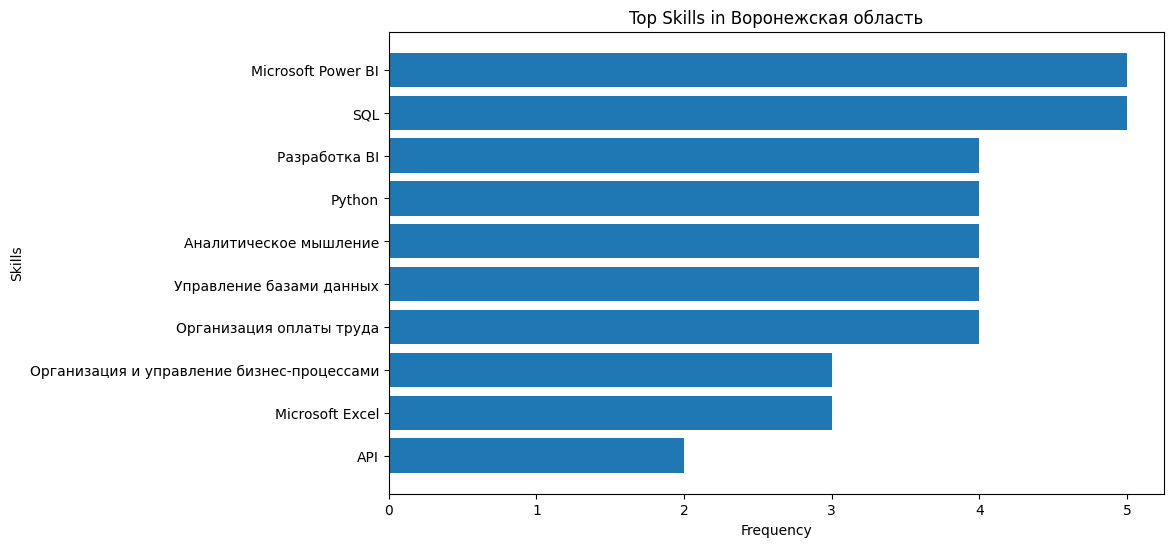

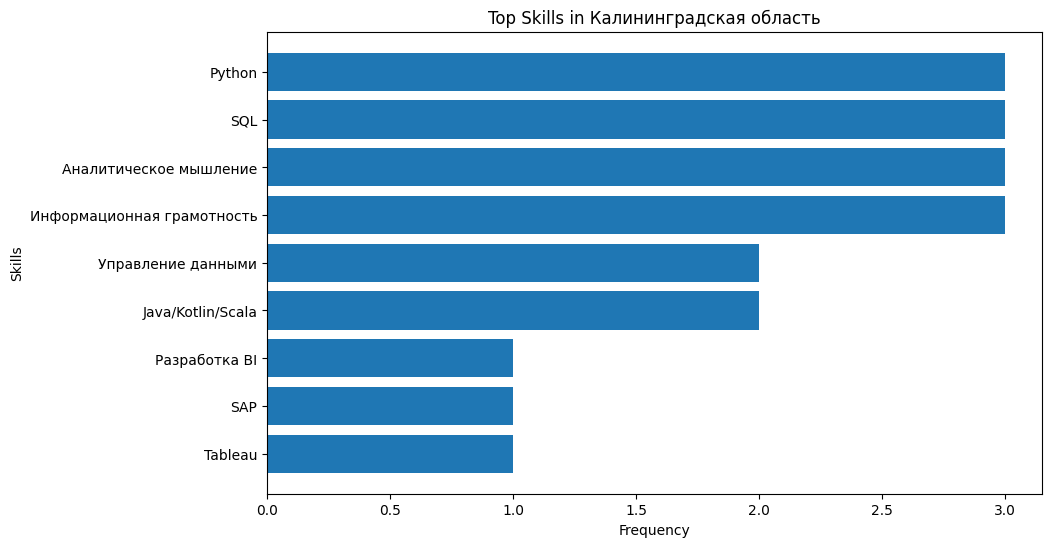

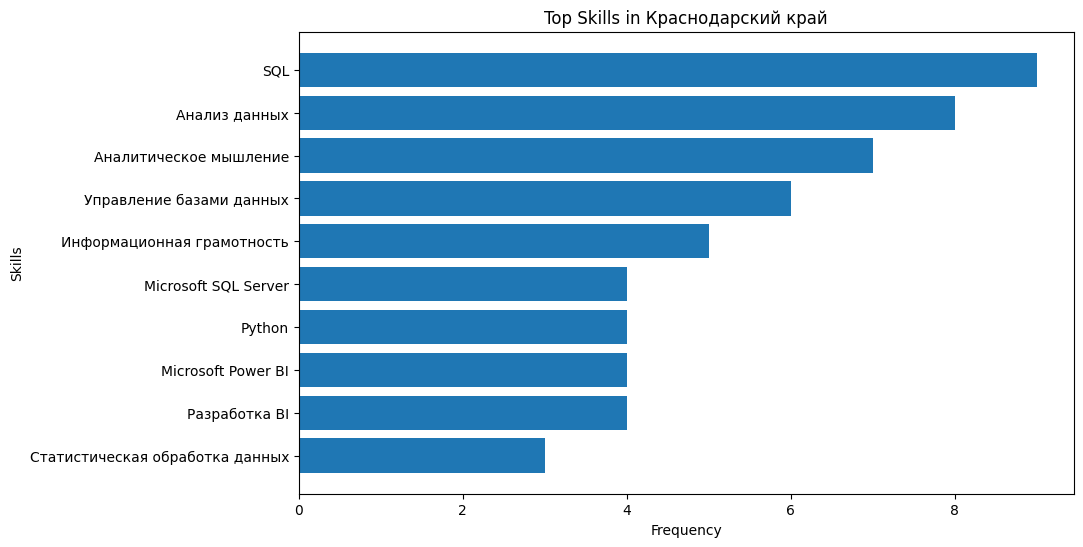

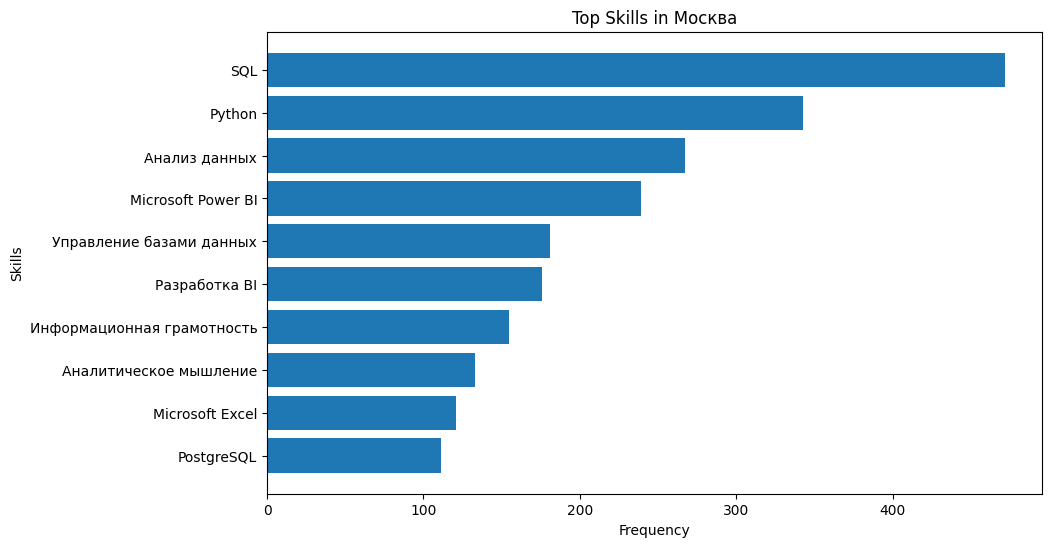

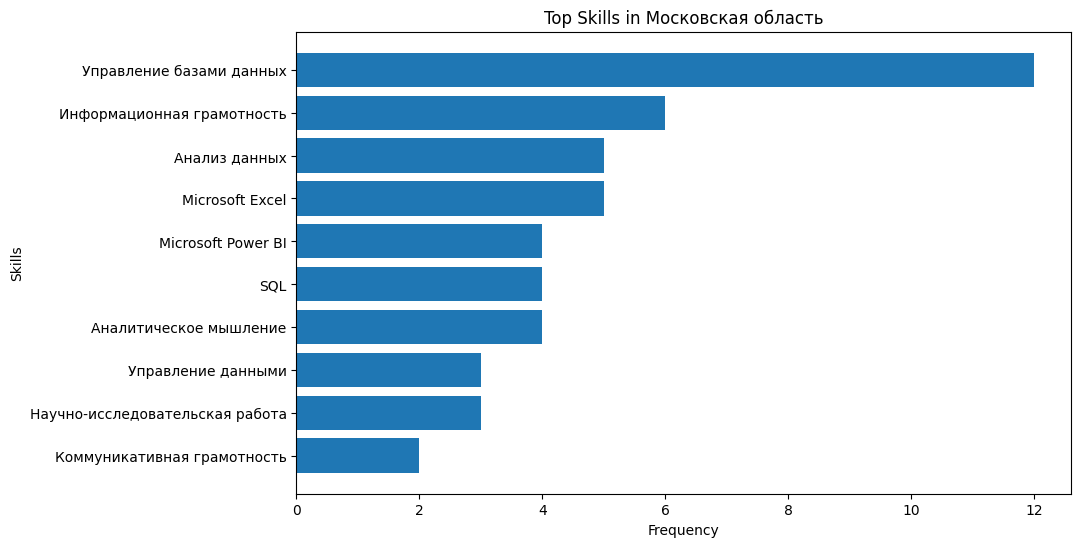

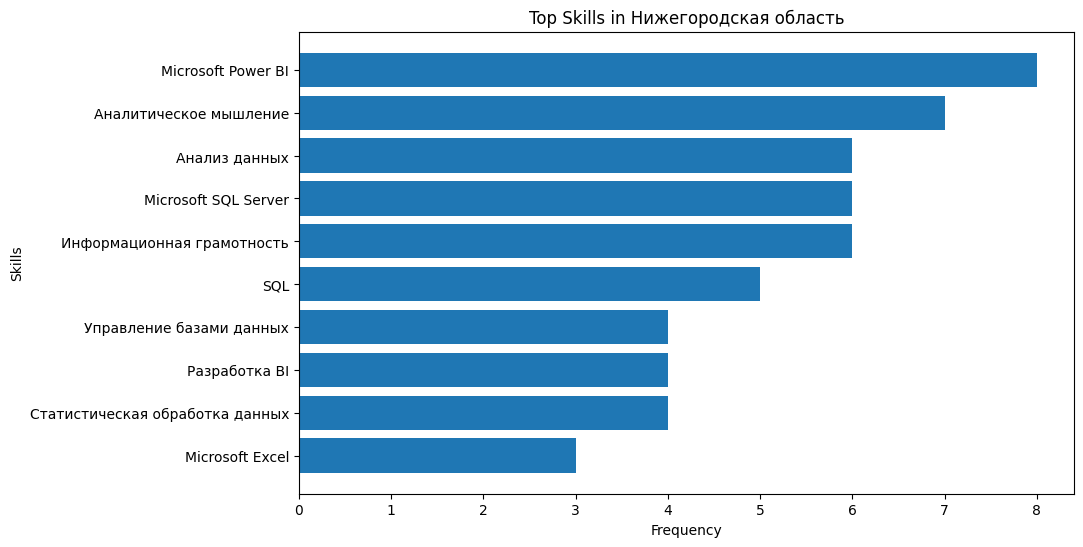

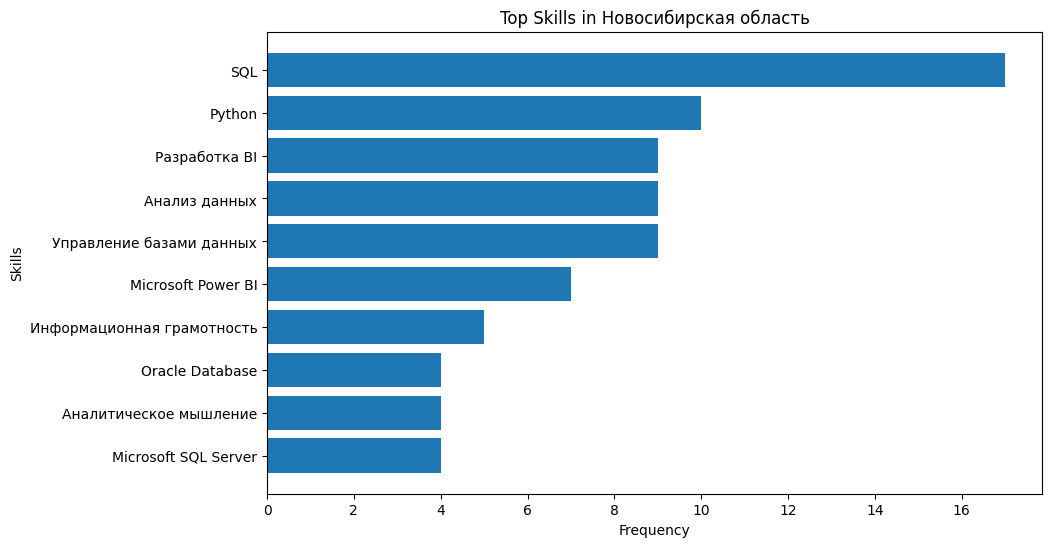

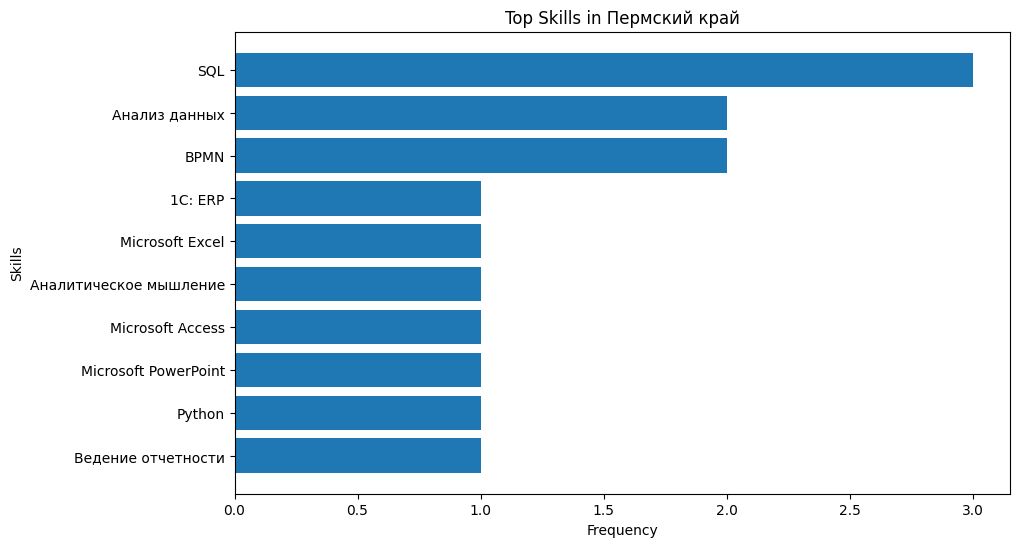

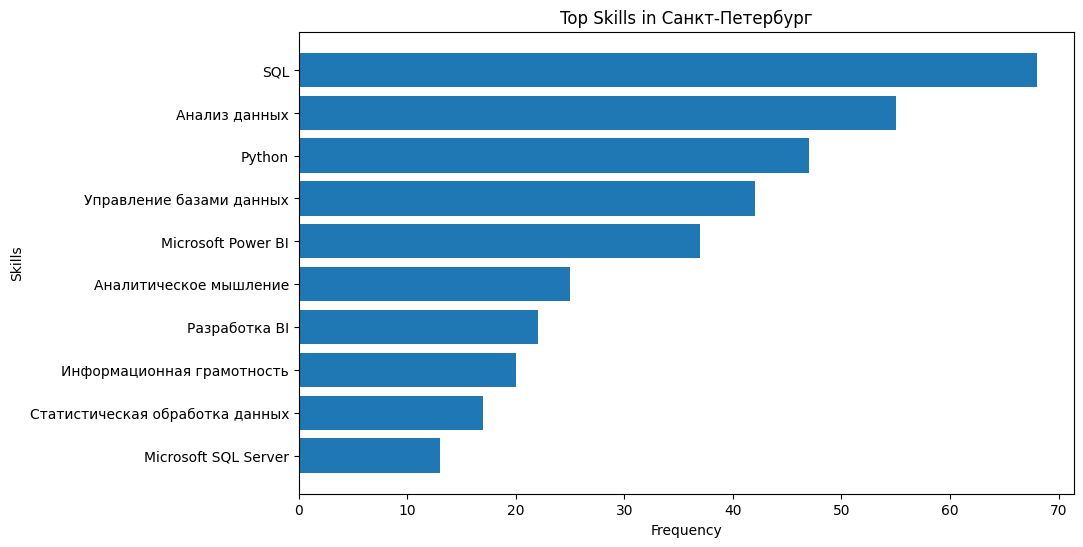

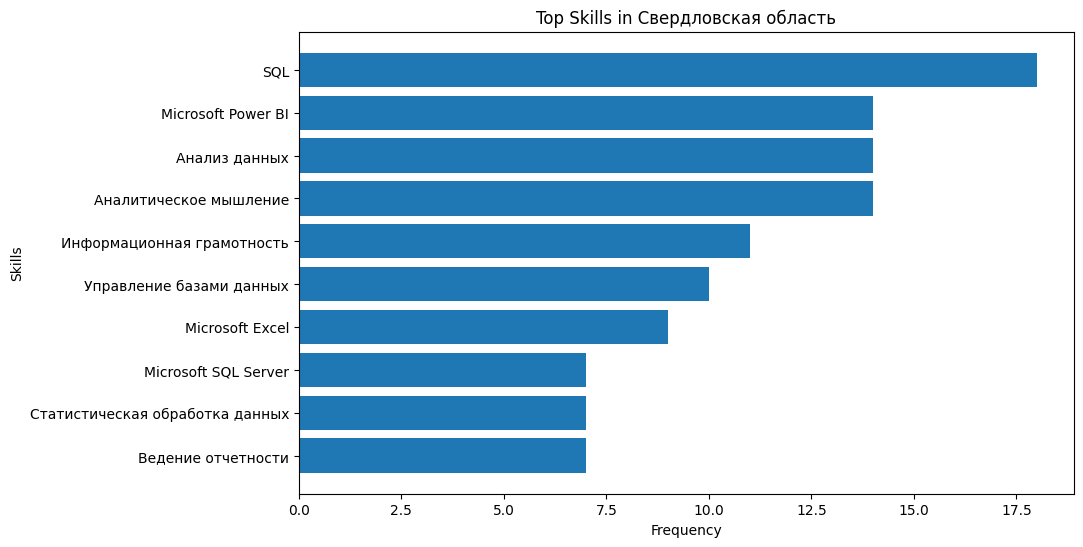

In [10]:
grouped_data = df.groupby("Название региона")

# Подсчет частотности навыков для каждого региона
skills_frequency_by_region = {}

for region, region_data in grouped_data:
    skills_frequency = {}
    for skills_str in region_data["Ключевые навыки"]:
        if isinstance(skills_str, str):
            skills = skills_str.split(";")
            for skill in skills:
                if skill in skills_frequency:
                    skills_frequency[skill] += 1
                else:
                    skills_frequency[skill] = 1

    skills_frequency_by_region[region] = skills_frequency

# Визуализация результатов
for region, skills_frequency in skills_frequency_by_region.items():
    sorted_skills_frequency = sorted(skills_frequency.items(), key=lambda x: x[1], reverse=True)
    top_skills = sorted_skills_frequency[:10]  # Показываем только топ-10 навыков
    if top_skills:  # Проверка наличия навыков
        skills, frequencies = zip(*top_skills)
        plt.figure(figsize=(10, 6))
        plt.barh(skills, frequencies)
        plt.title(f"Top Skills in {region}")
        plt.xlabel("Frequency")
        plt.ylabel("Skills")
        plt.gca().invert_yaxis()
        plt.show()

### По результатам анализа региональной специфики востребованных навыков можно сделать следующие выводы:

1. **Общая картина**: Анализ выявил различия в востребованных навыках в зависимости от региона. Это может быть связано с особенностями рынка труда, спецификой отраслей или потребностями компаний в конкретных регионах.

2. **Топ-10 навыков**: Представлены топ-10 наиболее часто встречающихся навыков в каждом регионе. Это помогает понять, какие компетенции являются ключевыми для работодателей в каждом конкретном месте.

3. **Рекомендации**: На основе данных можно дать рекомендации соискателям о том, какие навыки стоит освоить или улучшить, чтобы быть более конкурентоспособными на рынке труда в конкретном регионе.

4. **Дальнейшие исследования**: Полученные результаты могут быть использованы для проведения более глубокого анализа, например, исследования тенденций изменения востребованных навыков во времени или сравнения с данными о зарплатах и вакансиях в разных регионах.

# Произведена кластеризация выделенных навыков

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["tokens"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

df["cluster"] = kmeans.labels_

C:\Users\royti\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\royti\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


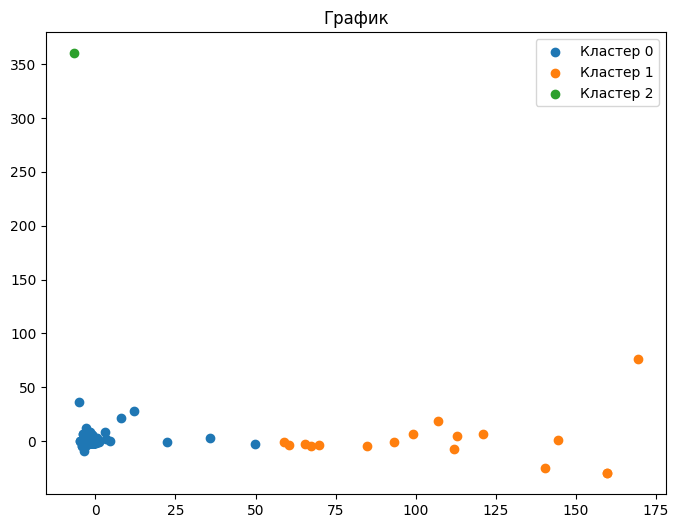

In [13]:
plt.figure(figsize=(8, 6))

for cluster_label in range(3):
    cluster_data = X_pca[df["cluster"] == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Кластер {cluster_label}')

plt.title('График')
plt.legend()
plt.show()

# Произведена классификация выделенных навыков

In [14]:
df2 = df.copy()

In [15]:
# Преобразование категориальных значений в числовые коды
label_encoder = LabelEncoder()
df2["Ключевые навыки"] = label_encoder.fit_transform(df2["Ключевые навыки"].fillna('Пусто'))

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, df2["Ключевые навыки"], test_size=0.2, random_state=42)

# Создание и обучение модели SVC с линейным ядром
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = classifier.predict(X_test)

# Вывод отчета о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          29       1.00      1.00      1.00         1
          33       0.00      0.00      0.00         0
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         1
          55       1.00      1.00      1.00         1
          61       0.00      0.00      0.00         2
          65       1.00    

C:\Users\royti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\royti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\royti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

### По результатам классификации выделенных навыков с использованием модели SVC с линейным ядром можно сделать следующие выводы:

1. **Precision и Recall**: Значения precision и recall для большинства классов оказались равными нулю, что говорит о том, что модель недостаточно точно предсказывает принадлежность к классам.

2. **F1-score**: Метрика F1-score также показывает низкую эффективность классификации для большинства классов, так как большинство классов имеют нулевые значения.

3. **Интерпретация результатов**: Возможно, это связано с недостаточным количеством данных для обучения модели или неправильным выбором классификатора. В дальнейшем следует провести дополнительный анализ и оптимизацию модели для улучшения ее производительности.

4. **Требуется дополнительное исследование**: Полученные результаты указывают на необходимость дальнейших исследований и экспериментов с различными моделями и параметрами для достижения более высокой точности классификации.

# Построена таблица с классами навыков, содержанием, частотой встречаемости

In [16]:
# Создаем пустой список для хранения данных о навыках
skills_data = []

# Группируем данные по навыкам и подсчитываем частотность
grouped_data = df.groupby("Ключевые навыки")
for skill, skill_data in grouped_data:
    # Получаем содержание навыка из первой записи (так как оно одинаково для всех)
    content = skill_data.iloc[0]['Описание вакансии']
    # Получаем частоту встречаемости
    frequency = len(skill_data)
    # Добавляем данные в список
    skills_data.append({'Класс навыка': skill, 'Содержание': content, 'Частота встречаемости': frequency})

# Создаем DataFrame из списка
skills_df = pd.DataFrame(skills_data)

# Выводим первые несколько строк DataFrame
skills_df.sort_values(by='Частота встречаемости', ascending=False)


,Класс навыка,Содержание,Частота встречаемости
377,Python;SQL,Обязанности: Мониторинг метрик контроля качес...,16
288,Microsoft Power BI;Python;SQL,Привет! Несколько лет назад YCLIENTS был амбиц...,10
384,Python;SQL;Анализ данных,Мы — команда инженеров и датасаентистов в круп...,8
523,Проведение A/B тестирования;Python;SQL,"Привет! Я Руслан, Тимлид аналитики в Magnit Te...",7
445,Анализ данных,Мы команда Аналитического управления Центра Ко...,7
417,SQL,"Новые вызовы и эксперименты, которые помогут б...",7
300,Microsoft Power BI;SQL,Привет! Наша команда в поисках Data аналитика ...,5
131,DWH;Javascript;Microsoft SQL Server;Microsoft ...,"Финуслуги — это маркетплейс, созданный Московс...",5
192,IBM Cognos Business Intelligence;Microsoft SQL...,Ключевые задачи: Разработка и поддержка отчет...,5
115,DAX;Онлайн-аналитическая обработка (OLAP);Micr...,Ви.Тех - аккредитованная ИТ компания. Мы созда...,5


In [22]:
# Сохранение DataFrame в файл Excel (xlsx)
skills_df.to_excel('класс_навыков.xlsx', index=False)

# Проведён визуальный анализ статистики текстовых признаков

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\royti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


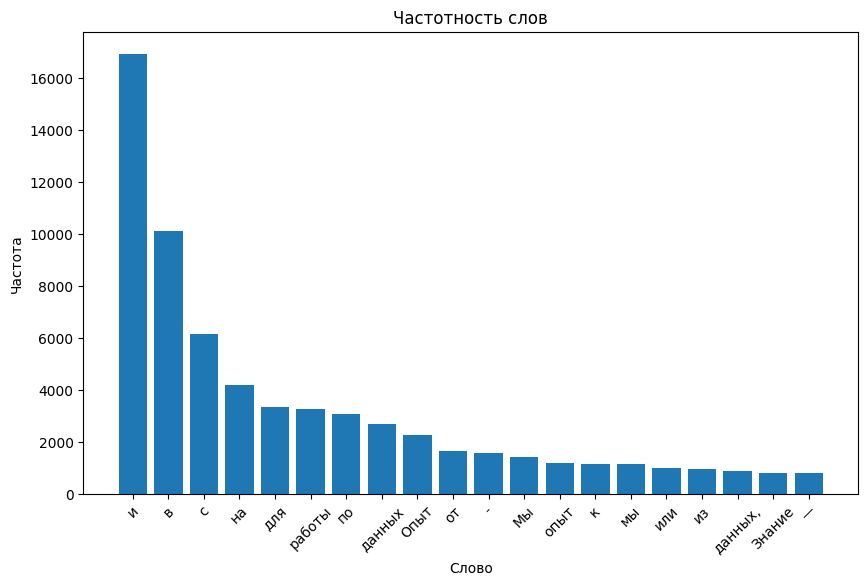

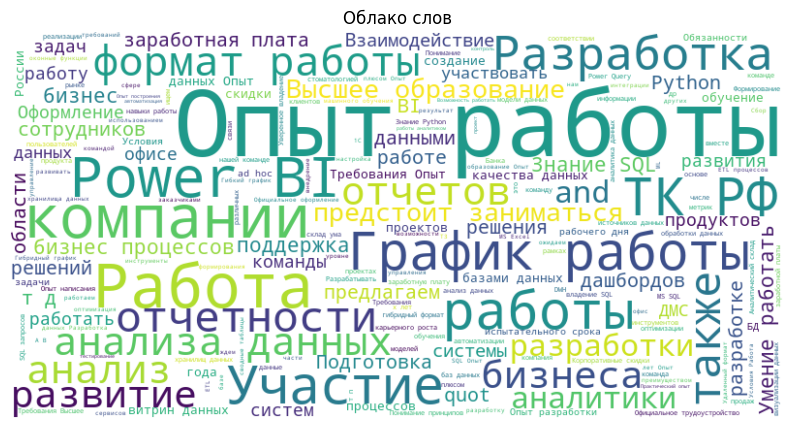

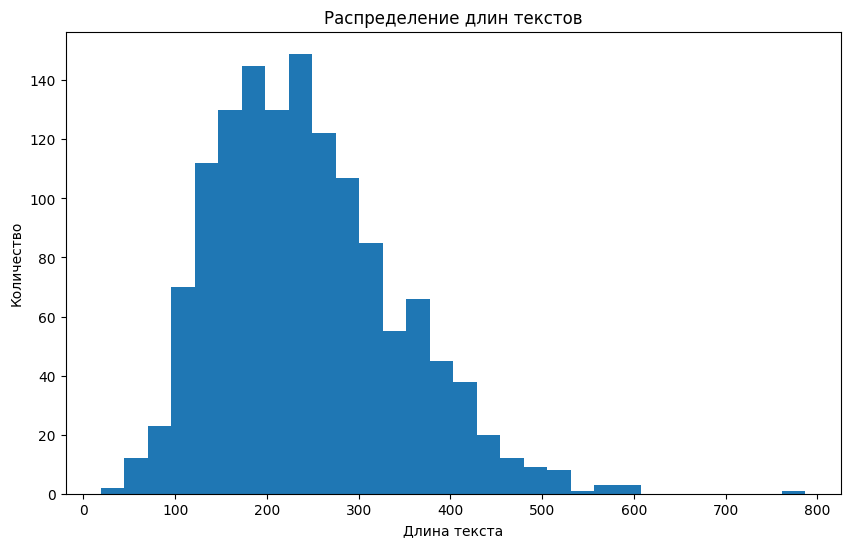

In [17]:
# Установка русского языка для nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("russian"))

# Подготовка текстовых данных
text_data = " ".join(df['Описание вакансии'])  # Объединяем все тексты в одну строку

# Гистограмма частотности слов
words = text_data.split()
word_counter = Counter(words)
common_words = word_counter.most_common(20)  # Топ-20 самых часто встречающихся слов
word_freq_df = pd.DataFrame(common_words, columns=['Слово', 'Частота'])
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Слово'], word_freq_df['Частота'])
plt.xticks(rotation=45)
plt.title('Частотность слов')
plt.xlabel('Слово')
plt.ylabel('Частота')
plt.show()

# Облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_data)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов')
plt.show()

# График распределения длин текстов
text_lengths = [len(text.split()) for text in df['Описание вакансии']]
plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=30)
plt.title('Распределение длин текстов')
plt.xlabel('Длина текста')
plt.ylabel('Количество')
plt.show()

# Определены наиболее востребованные навыки

In [18]:
# Объединяем все навыки в одну строку, пропуская пропущенные значения
all_skills = ';'.join(str(skill) for skill in df['Ключевые навыки'] if isinstance(skill, str))

# Разбиваем строку на отдельные навыки
skills_list = all_skills.split(';')

# Подсчитываем частоту встречаемости каждого навыка
skills_counter = Counter(skills_list)

# Сортируем навыки по частоте встречаемости в порядке убывания
sorted_skills = sorted(skills_counter.items(), key=lambda x: x[1], reverse=True)

# Выводим наиболее востребованные навыки
print("Наиболее востребованные навыки:")
for skill, frequency in sorted_skills[:10]:  # Показываем только топ-10 навыков
    print(f"{skill} - {frequency}")

    # Сортируем навыки по частоте встречаемости в порядке возрастания
sorted_skills = sorted(skills_counter.items(), key=lambda x: x[1])

# Выводим наименее востребованные навыки
print("\nНаименее востребованные навыки:")
for skill, frequency in sorted_skills[:10]:  # Показываем только топ-10 навыков
    print(f"{skill} - {frequency}")


Наиболее востребованные навыки:
SQL - 604
Python - 420
Анализ данных - 366
Microsoft Power BI - 318
Управление базами данных - 269
Разработка BI - 229
Информационная грамотность - 213
Аналитическое мышление - 202
Microsoft Excel - 157
Microsoft SQL Server - 129

Наименее востребованные навыки:
Управленческое консультирование - 1
Google Sheets - 1
Применение методов ITSM - 1
ServiceDesk - 1
Знание локальных нормативных актов в сфере бухгалтерского учета - 1
Pascal/Delphi - 1
Разработка и внедрение системы KPI - 1
ABC-анализ - 1
Анализ потребителей - 1
IoT - 1


# Определены наиболее высокооплачиваемые навыки

In [19]:
# Убедимся, что столбец 'Ключевые навыки' не содержит пустых значений
df1 = df.dropna(subset=['Ключевые навыки'])

# Разбиваем строки по различным навыкам
skills_salaries = []
for _, row in df1.iterrows():
    skills = row['Ключевые навыки'].split(';')
    for skill in skills:
        skill = skill.strip()  # Убираем лишние пробелы и точки
        skills_salaries.append({'Навык': skill, 'Заработная плата': int(row['Заработная плата'])})  # Преобразуем в целое число

# Создаем DataFrame с разделенными навыками
skills_salaries_df = pd.DataFrame(skills_salaries)

# Группируем по навыкам и вычисляем среднюю заработную плату для каждого навыка
average_salary_by_skill = skills_salaries_df.groupby('Навык')['Заработная плата'].mean().sort_values(ascending=False)

# Выводим результаты
print(average_salary_by_skill)


Навык
ServiceDesk                                                        252000.000000
Применение методов ITSM                                            252000.000000
DevOps                                                             220000.000000
MapInfo Professional                                               200000.000000
IoT                                                                200000.000000
Разработка программного обеспечения                                200000.000000
Работа в ГИС-системах                                              200000.000000
Инженерные изыскания                                               200000.000000
ArenadataDB                                                        185000.000000
Проектирование баз данных                                          160000.000000
Чтение технической документации                                    160000.000000
Знание локальных нормативных актов в сфере бухгалтерского учета    150000.000000
Разработка архитектурн

# Подготовка отчётов

### Предобработка данных 
- Парсинг выполнен с указанных веб ресурсов.
- Выполнена преобработка данных.
- Задание выполнено на высокопрофессиональном уровне.

### Семантический анализ текста
- Произведён анализ связей между словами, понимание синтаксической и семантической структуры предложений.
- Определены функциональные роли слов.
- Выявление эмоциональной окраски фраз.
- Выполнен анализ региональной специфики востребованных навыков.
- Произведена кластеризация выделенных навыков.
- Произведена классификация выделенных навыков.

### Подготовка отчетов
- Сделан отчёт о проделанной работе

### Визуальный анализ статистики текстовых признаков
- Построена таблица с классами навыков, содержанием, частотой встречаемости.
- Проведен визуальный анализ статистики текстовых признаков.
- Определены наиболее и наименее востребованные навыки.
- Определены наиболее высокооплачиваемые навыки.

### Проектирование информационно-аналитических систем
- Реализованы методы защиты данных, представленные в дашборде.
- Выполнен мониторинг данных, отслеживание изменений.
- Описаны функциональные требования к дашборду.